# 2 topics

## Import libraries and datasets

In [ ]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c nlp-getting-started

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!pip install --upgrade transformers
!pip install simpletransformers

     |████████████████████████████████| 1.3MB 22.6MB/s 
     |████████████████████████████████| 2.9MB 55.1MB/s 
     |████████████████████████████████| 890kB 50.2MB/s 
     |████████████████████████████████| 1.1MB 50.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=6ad04509a6fd5d7123cf7314f09eba4eba4375d1618fb8a1f253fa64d17a6684
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 225kB 14.3MB/s 
     |████████████████████████████████| 1.8MB 35.1MB/s 
     |████████████████████████████████| 317kB 34.9MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 7.4MB 31.7MB/s 
     |████████████████████████████████| 163kB 58.3MB/s 
     |████████████████████████████████| 133kB 55.6MB/s 
     |███████████████████████████

## Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [ ]:
import re
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
MultiTopicDocs = pd.read_csv("/content/drive/My Drive/Sravani/Data/data-HealthMiniSportsNew500.csv")
MultiTopicDocs.head()

Unnamed: 0  ...                                        Topic_order
0           0  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1           1  ...  [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...
2           2  ...  [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...
3           3  ...  [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, ...
4           4  ...  [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...

[5 rows x 5 columns]

In [ ]:
''' 0:Health 1:Sports'''
Sentences = []
labels = []
for index, row in MultiTopicDocs.iterrows():
    Doc= row['Doc'].split("\n")
    Topics_order_string = row['Topic_order']
    Topics_order_string = Topics_order_string.replace("[", "")
    Topics_order_string = Topics_order_string.replace("]", "")
    actual_topic_order = Topics_order_string.split(",")
    actual_topic_order_num = [int(i) for i in actual_topic_order]
    for i in range(0,len(Doc)):
      Sentences.append(Doc[i])
      labels.append(actual_topic_order_num[i])
print(len(Sentences),len(labels))

94808 94808


In [ ]:
Data = pd.DataFrame(list(zip(Sentences,labels)), 
               columns =['text', 'labels']) 
Data.head()

text  labels
0  Jason Whitlock writes about the sports world f...       0
1  His columns are humorous, thought-provoking, a...       0
2  E-mail him or follow his Twitter or become a f...       0
3  First Take's Rob Parker apologized for his con...       0
4  Put on your thinking caps and open your minds ...       0

In [ ]:
train, test = train_test_split(Data, test_size=0.2, stratify=Data['labels'], random_state=42)
print(train.shape,test.shape)

(75846, 2) (18962, 2)


In [ ]:
# train = pd.read_csv('/content/train.csv')
# test  = pd.read_csv('/content/test.csv')
# sample_sub  = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train.head()

text  labels
259  this can be expected, because the bootstrappin...       1
130  for our analysis, we use the microarray data s...       1
151  each network module is generated using a modul...       1
860  <dig> for the estimated nose and tail position...       1
541  moreover, all manual interaction that is requi...       1

In [ ]:
# sample_sub.head()

id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0

In [ ]:
# print('Shape of train set {}'.format(train.shape))
# print('Shape of test  set {}'.format(test.shape))

Shape of train set (7613, 5)
Shape of test  set (3263, 4)


In [ ]:
# train.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
# test.drop(['id', 'keyword', 'location'], axis=1, inplace=True)

In [ ]:
train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [ ]:
# train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train['labels'].value_counts()

0    49706
1    26140
Name: labels, dtype: int64

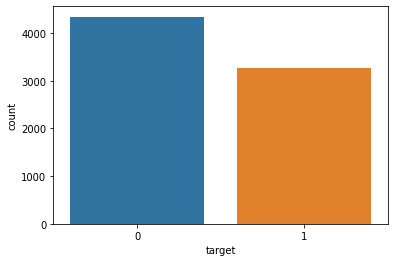

In [ ]:
# sns.countplot(train['target']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


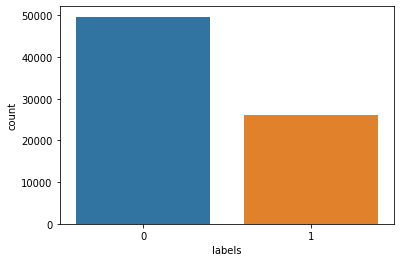

In [ ]:
sns.countplot(train['labels']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


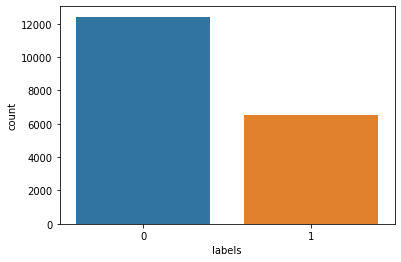

In [ ]:
sns.countplot(test['labels']);

In [ ]:
train_df, valid_df = train_test_split(train, test_size=0.2, stratify=train['labels'], random_state=42)

## Initialize a ClassificationModel

In [ ]:
model_args = ClassificationArgs(num_train_epochs=3,evaluate_during_training=True,no_save=True,evaluate_during_training_steps= 10000, use_cached_eval_features=True,output_dir = "outputs-large/", best_model_dir = "outputs-large/best_model/",save_optimizer_and_scheduler = True, overwrite_output_dir=True, manual_seed=42, silent=False, evaluate_during_training_verbose=True)

model = ClassificationModel(model_type='roberta', model_name='roberta-base', use_cuda=True, num_labels=2, 
                            args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

## Train the model

In [ ]:
model.train_model(train,eval_df = test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


## Evaluate the model

In [ ]:
# result, model_outputs, wrong_predictions = model.eval_model(valid_df)

In [ ]:
# result

{'eval_loss': 0.41687825866316625,
 'fn': 120,
 'fp': 125,
 'mcc': 0.6720497332586948,
 'tn': 744,
 'tp': 534}

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(valid_df)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
result

{'eval_loss': 0.6445808941320306,
 'fn': 4909,
 'fp': 0,
 'mcc': 0.0,
 'tn': 9313,
 'tp': 0}

In [ ]:
result

{'eval_loss': 0.644693530953507,
 'fn': 4909,
 'fp': 0,
 'mcc': 0.0,
 'tn': 9313,
 'tp': 0}

In [ ]:
result

In [ ]:
# predictions = []
# for x in model_outputs:
#     predictions.append(np.argmax(x))

# print('f1 score:', f1_score(valid_df['labels'], predictions))

f1 score: 0.8134044173648134


In [ ]:
predictions = []
for x in model_outputs:
    predictions.append(np.argmax(x))

print('f1 score:', f1_score(valid_df['labels'], predictions))

## Prediction on test set

In [ ]:
test_predictions, raw_outputs = model.predict([i for i in test['text']])

In [ ]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
[i for i in test['text'][0:10]]

['these were typically hypodiploid, hypotetraploid, or hypopolyploid with loss of only few chromosomes, indicating that they were most probably due to artifactual loss of chromosomes during preparation.',
 'the m. roreri genome size is larger than the genome of m. perniciosa, but the number of genes located in each genome is similar.. .',
 'datg <dig> is required for complete tissue regeneration in response to apoptosis.',
 'in addition, the slope of the plot with ssbba is different from that of ssbec.',
 'gene-expression levels can be monitored with cdna or oligonucleotide chips over a time-course for a temporal process.',
 "<cit>  reported that mn-excess did not affect fv/fm and psii quantum efficiency in mn-tolerant maize  'kneja 434', but the two parameters significantly decreased in mn-sensitive maize 'kneja 605' at the highest mn concentration.",
 'Roller noted that in 2010, the NFL earned $9 billion in revenue -- a figure he believes could be used to assist former players in nee

In [ ]:
raw_outputs

array([[ 0.31079102, -0.37890625],
       [ 0.31054688, -0.37890625],
       [ 0.31079102, -0.37890625],
       ...,
       [ 0.31079102, -0.37890625],
       [ 0.31079102, -0.37890625],
       [ 0.31079102, -0.37890625]])

In [ ]:
sample_sub['target'] = test_predictions

In [ ]:
sample_sub.to_csv('submission.csv', index=False)

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = ClassificationModel(
    "roberta", "outputs"
)

In [ ]:
test_predictions, _ = model.predict([i for i in test['text']])

In [ ]:
# print('accuracy:',accuracy_score(test['labels'], test_predictions))
print('f1 score:', f1_score(test['labels'], test_predictions))

f1 score: 0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 4 topics

## Import libraries and datasets

In [ ]:
!pip install --upgrade transformers
!pip install simpletransformers

Requirement already up-to-date: transformers in /usr/local/lib/python3.6/dist-packages (3.5.1)


## Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [1]:
import re
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
MultiTopicDocs = pd.read_csv("/content/drive/MyDrive/Anushree/four_topics.csv")
MultiTopicDocs.head()

Unnamed: 0                                               text  labels
0       75734  Per  , has any journalist looked into the spec...       2
1      120203                    You know it's going to be good.       3
2       49042  It also may have helped fuel his bid to win in...       1
3      127941  just fedex it to me and shave 2 days off the w...       3
4       16400  we noted that mog 35- <dig> dextramers detecte...       0

In [6]:
Data = MultiTopicDocs

In [7]:
train, test = train_test_split(Data, test_size=0.25, stratify=Data['labels'], random_state=42)
print(train.shape,test.shape)

(97566, 3) (32522, 3)


In [10]:
import pandas as pd
Data = pd.DataFrame(test, 
               columns =['text', 'labels']) 
Data = Data.sample(frac = 1)
Data.head(5)
Data.to_csv('/content/drive/MyDrive/Anushree/validation.csv')

In [ ]:
train.head()

Unnamed: 0                                               text  labels
34943        82191                          "I couldn't brace myself.       2
79421       116168  It is nothing more than generic catch all ingr...       3
119289       17948  one of the qnr sequences found in this metagen...       0
72797           69  heat map of hierarchical clustering of top dif...       0
52278         4514           created dsg launching platforms: yl hkd.       0

In [ ]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [ ]:

train['labels'].value_counts()

2    27486
0    27094
3    23876
1    19110
Name: labels, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


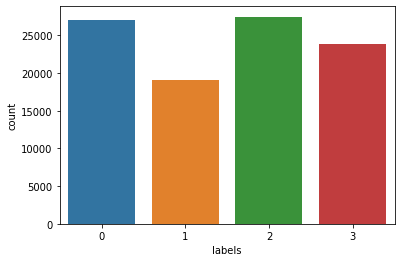

In [ ]:
sns.countplot(train['labels']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


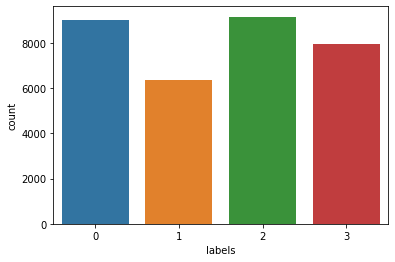

In [ ]:
sns.countplot(test['labels']);

In [ ]:
# train_df, valid_df = train_test_split(train, test_size=0.2, stratify=train['labels'], random_state=42)

## Initialize a ClassificationModel

In [ ]:
model_args = ClassificationArgs(num_train_epochs=3,evaluate_during_training=True, use_cached_eval_features=True,output_dir = "output_4_topics/", best_model_dir = "output_4_topics/best_model/",save_optimizer_and_scheduler = True, overwrite_output_dir=True, manual_seed=42, silent=False, evaluate_during_training_verbose=True)

model = ClassificationModel(model_type='bert', model_name='bert-base-uncased', use_cuda=True, num_labels=4, 
                            args=model_args)
model_args.use_early_stopping = True
model_args.early_stopping_delta = 0.01
model_args.early_stopping_metric = "mcc"
model_args.early_stopping_metric_minimize = False
model_args.early_stopping_patience = 5

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Train the model

In [ ]:
model.train_model(train,eval_df = test)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(24000,
 {'eval_loss': [0.25881418115912186,
   0.22087775857851025,
   0.19675078806814797,
   0.19913898097913052,
   0.20727697324349562,
   0.1964339535445953,
   0.17932913671531148,
   0.23219903022337615,
   0.2190525759403217,
   0.22583560306267322,
   0.23990440037307587,
   0.23519170441952536,
   0.20834896918086065],
  'global_step': [2000,
   4000,
   6000,
   8000,
   10000,
   12000,
   12196,
   14000,
   16000,
   18000,
   20000,
   22000,
   24000],
  'mcc': [0.8958702009934019,
   0.906857069155017,
   0.906104226212342,
   0.9127257424643005,
   0.9083759570751953,
   0.9071036271307275,
   0.9178993726781223,
   0.9174629030518154,
   0.9183736910995471,
   0.9118979473321909,
   0.9200044975407933,
   0.9234430518877723,
   0.9204574586200851],
  'train_loss': [0.5312722325325012,
   0.002793981460854411,
   0.6782530546188354,
   0.0032021068036556244,
   0.004765338264405727,
   0.004228153731673956,
   0.6813485622406006,
   0.0022447495721280575,
   0.008768

## Evaluate the model

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test)

In [ ]:
result

{'eval_loss': 0.38250417309609475, 'mcc': 0.8710628548833355}

In [ ]:
# predictions = []
# for x in model_outputs:
#     predictions.append(np.argmax(x))

# print('f1 score:', f1_score(valid_df['labels'], predictions))

## Prediction on test set

In [ ]:
model = ClassificationModel(
    "bert", '/content/output_4_topics/checkpoint-22000'
)

In [ ]:
test_predictions, raw_outputs = model.predict([i for i in test['text']])

In [ ]:
test_predictions

[2,
 1,
 3,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 3,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 3,
 1,
 2,
 2,
 0,
 1,
 1,
 3,
 2,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 2,
 0,
 2,
 3,
 3,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 3,
 3,
 0,
 3,
 1,
 3,
 0,
 2,
 0,
 2,
 0,
 3,
 0,
 2,
 3,
 2,
 0,
 2,
 1,
 0,
 0,
 3,
 0,
 3,
 2,
 2,
 0,
 3,
 0,
 2,
 3,
 3,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 1,
 0,
 3,
 3,
 2,
 0,
 2,
 3,
 3,
 1,
 2,
 3,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 3,
 1,
 0,
 0,
 2,
 2,
 3,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 0,
 2,
 1,
 0,
 2,
 3,
 2,
 3,
 0,
 1,
 2,
 3,
 3,
 3,
 0,
 0,
 2,
 2,
 2,
 3,
 3,
 0,
 2,
 0,
 3,
 2,
 2,
 3,
 0,
 3,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 3,
 0,
 3,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 2,
 0,
 3,
 0,
 3,
 2,
 2,
 2,
 3,
 2,
 0,
 1,
 2,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 0,
 2,
 1,
 2,
 3,
 1,
 0,
 0,
 0,
 3,
 3,
 3,
 1,
 0,
 2,
 3,
 3,
 1,
 0,
 3,
 0,
 0,
 0,
 2,


In [ ]:
from sklearn.metrics import matthews_corrcoef
print('mcc:',matthews_corrcoef(test['labels'], test_predictions))

mcc: 0.9234430518877723


In [ ]:
print('accuracy:',accuracy_score(test['labels'], test_predictions))
print('f1 score - macro:', f1_score(test['labels'], test_predictions, average='macro'))
print('f1 score - micro:', f1_score(test['labels'], test_predictions, average='micro'))
print('f1 score - weighted:', f1_score(test['labels'], test_predictions, average='weighted'))

accuracy: 0.940501814156571
f1 score - macro: 0.9368270054396081
f1 score - micro: 0.940501814156571
f1 score - weighted: 0.9405932228584726


In [ ]:
!cp "/content/output_4_topics/checkpoint-22000" -r "/content/drive/MyDrive/Anushree"

#generatating required csv file

In [ ]:
MultiTopicDocs = pd.read_csv("/content/drive/My Drive/Sravani/data-4topics500.csv")
MultiTopicDocs.head()

Unnamed: 0  ...                                        Topic_order
0           0  ...  [2, 2, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 0, ...
1           1  ...  [0, 0, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 3, 3, ...
2           2  ...  [0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 3, 0, 3, 3, ...
3           3  ...  [1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, ...
4           4  ...  [3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, ...

[5 rows x 5 columns]

In [ ]:
model = ClassificationModel(
    "bert", "/content/drive/MyDrive/Anushree/bert_4_topics_best"
)

In [ ]:
j=1
ind_accuracy=[]
true_label = []
pred_label = []
col1 = []
col2 = []
for index, row in MultiTopicDocs.iterrows():
    col1.append(row['Doc'])
    topic_separated_doc = [[] for _ in np.arange(4)]
    Document= row['Doc'].split("\n")
    Topics_order_string = row['Topic_order']
    Topics_order_string = Topics_order_string.replace("[", "")
    Topics_order_string = Topics_order_string.replace("]", "")
    actual_topic_order = Topics_order_string.split(",")
    # print(len(Document),len(actual_topic_order))

    actual_topic_order_num = [int(i) for i in actual_topic_order] 

    predicted_topic_order,_ = model.predict(Document)

    for i in np.arange(len(predicted_topic_order)):
      topic_separated_doc[predicted_topic_order[i]].append(Document[i])

    for i in np.arange(4):
      topic_separated_doc[i] = '\n'.join(topic_separated_doc[i])
    col2.append(topic_separated_doc)

    print(len(predicted_topic_order))
    print(predicted_topic_order)
    print(actual_topic_order_num)
    print(len(actual_topic_order_num))
    match = 0
    for i in range(0,len(actual_topic_order_num)):
      if actual_topic_order_num[i]==predicted_topic_order[i]:
        match = match+1
    ind_accuracy.append(match/len(actual_topic_order_num))
    #break

    #f1 score
    true_label += actual_topic_order_num
    pred_label += predicted_topic_order

# print(len(ind_accuracy))
# print(sum(ind_accuracy) / len(ind_accuracy))


247
[2, 2, 2, 2, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 0, 3, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 3, 2, 0, 0, 3, 0, 3, 2, 2, 0, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3, 3, 3, 2, 3, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 0, 3, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 3, 2, 0, 0, 3, 0, 3, 2, 2, 0, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3, 3, 3, 2, 3, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 


132
[2, 0, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 0, 3, 0, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 0, 0, 3, 1, 3, 0, 1, 3, 1, 3, 3, 3, 0, 0, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 0, 0, 3, 0, 1, 1, 0, 3, 3, 3, 0, 1, 0, 0, 0, 0, 1, 3, 1, 3, 3, 3, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 0, 3, 0, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 0, 0, 3, 1, 3, 0, 1, 3, 1, 3, 3, 3, 0, 0, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 0, 0, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 0, 0, 0, 0, 1, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
132



229
[2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 3, 0, 3, 3, 3, 2, 1, 1, 0, 3, 3, 3, 1, 2, 1, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 1, 0, 0, 3, 1, 1, 2, 2, 2, 2, 3, 0, 0, 3, 2, 2, 3, 0, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 3, 2, 2, 2, 3, 0, 0, 3, 2, 0, 3, 3, 0, 2, 3, 0, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0, 2, 3, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 3, 0, 3, 3, 3, 2, 1, 1, 0, 3, 3, 3, 1, 2, 1, 3, 2, 3, 0, 1, 0, 1, 3, 0, 3, 1, 0, 0, 3, 1, 1, 2, 0, 2, 2, 3, 0, 0, 3, 2, 2, 3, 0, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 3, 2, 2, 2, 3, 0, 0, 3, 2, 0, 3, 3, 0, 2, 3, 0, 2, 3, 3, 3, 3, 2, 2, 0, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 0, 2, 3, 


39
[1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3]
[1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
39



98
[3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
98



91
[2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
[2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
91



131
[2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
131



208
[1, 2, 2, 0, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3, 1, 1, 2, 3, 1, 2, 2, 3, 3, 0, 3, 1, 3, 1, 2, 3, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 2, 1, 1, 2, 3, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 3, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 1, 2, 0, 1, 1, 3, 0, 1, 2, 0, 3, 1, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 1, 2, 0, 0, 0, 2, 3, 2, 3, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 0, 3, 3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 0, 3, 1, 3, 2, 2, 3, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 2, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 3, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 1, 2, 0, 1, 1, 3, 0, 1, 0, 0, 3, 1, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 1, 2, 0, 0, 0, 1, 3, 2, 3, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 


328
[2, 1, 1, 2, 2, 2, 0, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 1, 3, 3, 3, 0, 1, 3, 2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0, 3, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 3, 0, 2, 0, 0, 3, 2, 3, 0, 2, 2, 1, 3, 3, 3, 0, 3, 3, 1, 3, 2, 0, 2, 2, 2, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 3, 2, 0, 0, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 0, 3, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 3, 1, 0, 1, 3, 3, 0, 2, 0, 0, 3, 2, 3, 0, 1, 0, 0, 0, 0, 2, 3, 3, 1, 2, 1, 0, 3, 2, 2, 1, 2, 2, 2, 3, 3, 0, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 1, 2, 3, 1, 0, 1, 2, 3, 1, 0, 0, 1, 1, 2, 2, 2, 3, 0, 0, 2, 0, 3, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 


226
[2, 3, 3, 0, 1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


156
[1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
156



334
[2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0


249
[1, 3, 3, 2, 2, 3, 2, 3, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 3, 0, 3, 3, 2, 0, 3, 3, 1, 0, 3, 3, 0, 3, 0, 1, 1, 3, 1, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 2, 2, 3, 3, 3, 0, 0, 0, 3, 1, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 3, 2, 2, 3, 0, 3, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 3, 0, 3, 3, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 


231
[1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 3, 2, 2, 1, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 


445
[3, 1, 2, 1, 3, 0, 1, 1, 3, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 3, 2, 3, 0, 2, 3, 2, 0, 1, 3, 0, 1, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 3, 2, 2, 3, 2, 0, 0, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 3, 2, 2, 0, 0, 3, 0, 3, 0, 2, 2, 2, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 2, 2, 3, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


66
[3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 2, 1, 2, 2, 3, 2, 1, 3, 3, 2, 1, 1, 2, 3, 1, 3, 2, 3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
66



356
[1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 3, 0, 2, 2, 1, 0, 3, 2, 2, 2, 1, 0, 0, 0, 1, 2, 3, 2, 1, 1, 0, 0, 2, 0, 3, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 2, 3, 0, 3, 2, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 0, 3, 1, 1, 0, 2, 0, 3, 1, 1, 1, 2, 2, 2, 2, 3, 3, 0, 1, 1, 1, 2, 1, 3, 3, 1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 2, 0, 2, 0, 0, 3, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


185
[3, 3, 1, 2, 2, 3, 0, 3, 3, 2, 0, 0, 3, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 2, 3, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 2, 2, 2, 3, 0, 2, 0, 3, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 2, 0, 2, 3, 0, 3, 3, 2, 0, 0, 3, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 2, 3, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 2, 2, 2, 3, 0, 2, 0, 3, 3, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


180
[3, 3, 3, 2, 3, 0, 2, 0, 3, 0, 1, 3, 2, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


458
[1, 2, 2, 3, 0, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 0, 2, 3, 3, 1, 0, 0, 1, 3, 3, 1, 3, 2, 1, 3, 2, 2, 0, 0, 0, 0, 3, 3, 0, 2, 3, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 3, 0, 3, 2, 2, 2, 2, 1, 0, 3, 2, 3, 0, 3, 2, 2, 1, 0, 3, 3, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 0, 1, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


589
[1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 3, 1, 0, 3, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 3, 2, 0, 3, 2, 0, 2, 2, 2, 2, 3, 0, 0, 0, 3, 2, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 0, 3, 0, 0, 3, 2, 2, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


244
[2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 


69
[1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
69



43
[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
43



226
[2, 2, 2, 3, 0, 2, 1, 1, 0, 3, 0, 2, 0, 3, 1, 2, 3, 1, 2, 0, 3, 1, 0, 0, 2, 2, 3, 2, 3, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 3, 1, 1, 3, 3, 0, 0, 0, 2, 1, 2, 3, 3, 2, 0, 3, 1, 3, 3, 0, 1, 0, 0, 1, 3, 1, 3, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 0, 2, 1, 1, 0, 3, 0, 2, 0, 3, 2, 2, 3, 1, 2, 0, 3, 0, 0, 0, 2, 2, 3, 3, 3, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 3, 1, 1, 3, 3, 0, 0, 0, 2, 1, 1, 3, 3, 2, 0, 3, 1, 3, 3, 0, 1, 0, 0, 1, 3, 1, 3, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 


28
[3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
28



74
[1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
74



223
[2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


199
[1, 2, 2, 2, 2, 2, 3, 1, 0, 0, 1, 3, 2, 0, 0, 3, 2, 1, 1, 2, 0, 3, 2, 3, 3, 0, 3, 3, 1, 2, 2, 1, 0, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 0, 2, 3, 2, 0, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 0, 2, 3, 2, 2, 2, 3, 3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 3, 2, 0, 2, 0, 2, 3, 2, 0, 0, 0, 2, 3, 2, 0, 3, 3, 3, 3, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[1, 0, 2, 2, 2, 1, 3, 2, 0, 0, 1, 3, 2, 0, 0, 3, 2, 1, 1, 2, 0, 3, 2, 3, 3, 0, 3, 3, 1, 2, 2, 1, 0, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 0, 2, 3, 2, 0, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 0, 2, 3, 2, 2, 2, 3, 3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 3, 2, 0, 2, 0, 2, 3, 2, 0, 0, 0, 2, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


346
[2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 1, 0, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 3, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 3, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


273
[3, 2, 3, 3, 2, 0, 2, 0, 3, 2, 3, 3, 2, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0, 2, 0, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 0, 0, 3, 2, 3, 3, 3, 2, 0, 2, 3, 3, 0, 3, 2, 2, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 2, 3, 3, 2, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 3, 2, 0, 3, 2, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 3, 3, 0, 0, 2, 0, 3, 2, 3, 3, 2, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0, 2, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 3, 0, 0, 3, 2, 3, 3, 3, 2, 0, 2, 3, 3, 0, 3, 2, 2, 0, 0, 3, 0, 3, 0, 0, 


63
[3, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2]
[3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2]
63



365
[3, 2, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 3, 0, 0, 2, 3, 0, 3, 3, 3, 2, 2, 1, 2, 0, 3, 2, 0, 2, 3, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 3, 1, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 0, 3, 3, 2, 2, 0, 3, 3, 2, 3, 3, 0, 0, 3, 2, 2, 3, 0, 3, 2, 0, 0, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 3, 3, 0, 2, 2, 3, 3, 2, 3, 3, 1, 0, 2, 3, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


315
[3, 1, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 0, 3, 1, 3, 3, 1, 1, 0, 3, 1, 0, 3, 3, 0, 1, 1, 3, 3, 2, 0, 2, 3, 3, 3, 1, 0, 3, 3, 1, 3, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 3, 3, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 2, 3, 0, 2, 1, 0, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 0, 2, 2, 0, 0, 2, 2, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0]
[3, 1, 1, 2, 1, 3, 1, 2, 0, 3, 3, 1, 0, 3, 1, 3, 


242
[2, 3, 2, 1, 2, 3, 1, 1, 0, 3, 3, 0, 3, 2, 1, 2, 0, 1, 3, 0, 3, 0, 0, 3, 3, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 2, 2, 1, 0, 2, 1, 3, 0, 2, 0, 0, 1, 2, 2, 2, 3, 1, 1, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 2, 0, 0, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 2, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 3, 0, 3, 2, 1, 2, 0, 1, 3, 0, 3, 0, 0, 3, 3, 1, 1, 2, 2, 1, 0, 1, 3, 1, 2, 2, 2, 1, 0, 2, 1, 3, 0, 2, 0, 0, 1, 1, 2, 2, 3, 1, 1, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 


288
[3, 2, 2, 1, 3, 0, 2, 2, 3, 0, 2, 1, 1, 3, 0, 1, 0, 0, 2, 0, 3, 2, 3, 3, 3, 2, 3, 2, 1, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 0, 3, 2, 2, 2, 2, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 2, 2, 0, 2, 3, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 3, 3, 0, 0, 3, 0, 2, 3, 3, 3, 2, 2, 0, 2, 0, 0, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 0, 2, 0, 2, 3, 3, 2, 2, 3, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[3, 0, 1, 1, 3, 0, 2, 2, 3, 0, 2, 1, 1, 3, 0, 1, 0, 0, 2, 0, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 2, 2, 0, 3, 2, 2, 


281
[2, 2, 2, 0, 1, 3, 3, 2, 3, 2, 1, 3, 0, 1, 3, 3, 0, 3, 1, 3, 1, 3, 2, 0, 1, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 3, 0, 0, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 1, 0, 1, 2, 0, 3, 1, 2, 2, 1, 0, 1, 0, 3, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 1, 2, 0, 0, 1, 1, 1, 2, 0, 3, 0, 2, 2, 3, 1, 0, 3, 1, 2, 0, 0, 1, 3, 2, 0, 2, 1, 1, 1, 1, 3, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 2, 3, 0, 3, 3, 1, 3, 1, 3, 3, 0, 3, 1, 0, 0, 3, 1, 1, 1, 2, 3, 2, 3, 0, 2, 3, 1, 0, 3, 2, 0, 3, 2, 2, 1, 3, 3, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 2, 0, 0, 1, 3, 3, 2, 3, 2, 1, 3, 0, 1, 1, 3, 0, 3, 1, 3, 1, 3, 2, 0, 1, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 3, 0, 0, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 


97
[2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3]
[2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3]
97



328
[3, 3, 1, 1, 3, 2, 1, 3, 0, 1, 0, 2, 1, 3, 0, 2, 0, 0, 2, 0, 3, 3, 0, 3, 2, 2, 3, 1, 2, 1, 2, 3, 3, 0, 0, 3, 0, 0, 1, 2, 0, 0, 3, 1, 3, 2, 3, 3, 3, 0, 0, 0, 3, 1, 3, 3, 0, 2, 0, 3, 0, 1, 3, 1, 3, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 3, 0, 0, 1, 3, 3, 0, 3, 3, 1, 0, 3, 0, 2, 1, 3, 0, 3, 3, 3, 2, 3, 1, 1, 1, 3, 1, 3, 1, 0, 2, 1, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 3, 0, 1, 0, 0, 3, 3, 0, 2, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 1, 


159
[1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
159



42
[1, 1, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
42



262
[2, 3, 2, 1, 3, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 3, 1, 0, 1, 2, 3, 2, 1, 3, 3, 0, 0, 2, 1, 2, 0, 0, 3, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 1, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 3, 0, 1, 1, 0, 2, 3, 2, 2, 1, 2, 3, 3, 2, 0, 3, 3, 2, 2, 2, 3, 2, 1, 2, 3, 0, 2, 2, 3, 0, 3, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 3, 3, 1, 3, 2, 3, 3, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[1, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 2, 2, 2, 3, 1, 0, 1, 2, 3, 2, 1, 3, 3, 0, 0, 2, 1, 1, 0, 0, 3, 2, 3, 2, 1, 1, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 1, 2, 0, 0, 2, 0, 


174
[3, 2, 0, 2, 3, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2, 0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 3, 0, 0, 2, 3, 2, 0, 3, 2, 0, 3, 2, 2, 2, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 0, 2, 0, 0, 2, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 3, 2, 0, 3, 3, 2, 3, 1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[3, 0, 0, 2, 3, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2, 0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 0, 2, 2, 0, 2, 2, 3, 2, 0, 0, 3, 0, 0, 2, 3, 2, 0, 3, 0, 0, 3, 2, 2, 2, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 0, 2, 0, 0, 2, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 3, 2, 0, 3, 3, 2, 3, 3, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 


254
[2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


199
[2, 2, 3, 0, 3, 3, 0, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 3, 0, 3, 3, 0, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


102
[1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
102



589
[2, 2, 0, 0, 2, 0, 0, 3, 0, 2, 1, 3, 2, 0, 0, 1, 0, 3, 2, 2, 1, 2, 2, 0, 1, 2, 1, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2, 0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 1, 1, 3, 1, 1, 2, 2, 0, 2, 0, 2, 2, 3, 0, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 1, 2, 1, 1, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 0, 2, 3, 2, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


71
[3, 3, 1, 3, 1, 1, 3, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1]
[3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1]
71



258
[1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0]
[1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


231
[3, 3, 2, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 1, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


212
[2, 3, 2, 3, 0, 2, 3, 0, 0, 3, 2, 2, 1, 2, 2, 1, 1, 3, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 3, 0, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 2, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 2, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3, 0, 3, 0, 2, 3, 0, 0, 3, 1, 2, 1, 2, 2, 1, 1, 3, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 3, 0, 2, 3, 2, 1, 3, 1, 1, 3, 2, 3, 2, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


105
[1, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 3, 2, 1, 1, 1, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
105



253
[2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 1, 1, 3, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 2, 3, 0, 3, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 3, 0, 3, 3, 0, 1, 3, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 


279
[1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0]
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


272
[2, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 1, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 


474
[2, 3, 1, 1, 2, 1, 2, 2, 3, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2


67
[2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
67



254
[3, 1, 1, 1, 2, 0, 1, 3, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 3, 1, 0, 2, 1, 2, 3, 3, 3, 3, 2, 0, 3, 0, 2, 0, 0, 0, 0, 3, 2, 3, 0, 2, 3, 3, 2, 0, 0, 0, 0, 3, 2, 1, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 3, 0, 2, 0, 3, 2, 0, 3, 2, 2, 2, 0, 2, 3, 0, 0, 2, 3, 3, 3, 2, 1, 0, 3, 3, 3, 2, 0, 0, 2, 2, 2, 3, 0, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 2, 2, 3, 2, 3, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[3, 1, 1, 1, 0, 0, 1, 3, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 3, 1, 0, 1, 1, 1, 3, 3, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 3, 2, 3, 0, 2, 3, 3, 2, 0, 0, 0, 0, 3, 2, 3, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 3, 0, 2, 0, 3, 2, 0, 3, 2, 0, 


257
[2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 3, 0, 0, 0, 0, 2, 3, 3, 0, 0, 3, 2, 0, 0, 3, 2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 3, 2, 3, 2, 3, 3, 0, 3, 2, 2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 0, 2, 2, 2, 3, 0, 3, 0, 0, 0, 2, 0, 2, 3, 0, 0, 3, 3, 1, 0, 1, 2, 3, 0, 0, 2, 2, 3, 0, 3, 1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 1, 3, 0, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 3, 0, 0, 0, 0, 2, 3, 3, 0, 0, 3, 2, 0, 0, 3, 2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 0, 2, 2, 2, 3, 0, 3, 0, 0, 0, 2, 0, 2, 3, 


75
[1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1]
[1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1]
75



318
[2, 2, 3, 0, 2, 0, 1, 2, 0, 3, 1, 3, 2, 2, 1, 2, 1, 0, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 3, 3, 1, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0, 3, 1, 1, 1, 0, 1, 0, 1, 1, 3, 3, 0, 3, 0, 1, 2, 0, 0, 1, 1, 1, 0, 3, 2, 0, 3, 0, 3, 1, 1, 0, 1, 3, 3, 3, 0, 0, 3, 0, 1, 3, 0, 2, 2, 1, 0, 1, 3, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[2, 0, 3, 0, 2, 0, 1, 2, 0, 3, 1, 3, 1, 


389
[2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 3, 2, 3, 3, 3, 2, 1, 2, 2, 0, 3, 3, 3, 2, 2, 3, 0, 3, 1, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 2, 0, 2, 2, 1, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 0, 2, 3, 2, 0, 3, 0, 1, 0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


120
[1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 1, 3, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1]
[1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3, 3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 2, 3, 1, 1, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 1, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
120



444
[1, 1, 2, 2, 3, 1, 3, 3, 3, 0, 2, 3, 0, 2, 1, 1, 3, 3, 2, 3, 1, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 1, 0, 1, 0, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 3, 0, 2, 2, 2, 0, 2, 3, 1, 1, 1, 3, 1, 1, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 2, 3, 2, 0, 0, 3, 0, 0, 2, 1, 2, 0, 0, 2, 3, 2, 3, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 3, 3, 0, 3, 3, 3, 2, 0, 3, 3, 3, 0, 0, 2, 0, 1, 3, 0, 0, 2, 0, 3, 0, 3, 0, 1, 0, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0


310
[2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 3, 2, 2, 2, 0, 3, 0, 0, 1, 2, 3, 3, 2, 0, 1, 0, 0, 3, 0, 2, 2, 2, 0, 0, 2, 0, 0, 3, 0, 3, 0, 0, 2, 0, 2, 2, 2, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 2, 2, 3, 2, 0, 0, 2, 1, 0, 3, 2, 0, 2, 0, 0, 2, 3, 3, 0, 3, 0, 0, 0, 1, 2, 3, 2, 3, 3, 3, 3, 2, 0, 0, 2, 3, 2, 3, 3, 2, 0, 3, 3, 2, 0, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
[2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 


240
[2, 2, 3, 2, 0, 3, 2, 0, 2, 3, 3, 2, 0, 2, 3, 2, 2, 2, 2, 0, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 3, 2, 0, 3, 2, 0, 0, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 2, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[0, 2, 3, 2, 0, 3, 3, 0, 2, 3, 3, 2, 0, 2, 3, 2, 2, 2, 2, 0, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 3, 2, 0, 3, 2, 0, 0, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 2, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 


253
[3, 2, 3, 2, 2, 0, 0, 2, 3, 0, 0, 3, 3, 1, 2, 1, 2, 2, 3, 0, 2, 2, 3, 2, 3, 3, 3, 2, 0, 2, 2, 0, 2, 0, 2, 3, 0, 0, 3, 2, 3, 0, 0, 3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 3, 2, 2, 0, 3, 0, 3, 3, 0, 2, 2, 3, 3, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 3, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 2, 0, 3, 2, 3, 3, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 3, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 3, 0, 2, 0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 1, 1, 2, 3, 0, 2, 2, 3, 2, 3, 3, 3, 2, 0, 2, 2, 0, 2, 0, 2, 3, 0, 0, 3, 2, 3, 0, 0, 3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 3, 2, 2, 0, 3, 0, 3, 3, 0, 2, 2, 3, 3, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 3, 2, 


338
[1, 1, 1, 1, 1, 3, 2, 1, 3, 2, 3, 2, 0, 0, 0, 3, 1, 2, 0, 3, 3, 3, 1, 1, 0, 1, 3, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 3, 2, 3, 0, 0, 0, 2, 0, 3, 3, 2, 0, 2, 2, 0, 3, 2, 0, 0, 0, 2, 2, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 3, 3, 3, 2, 3, 3, 2, 0, 2, 0, 3, 3, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


223
[3, 3, 3, 3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 


358
[1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 3, 1, 0, 2, 0, 2, 0, 0, 2, 3, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 3, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 3, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


451
[2, 0, 3, 1, 3, 3, 2, 1, 3, 3, 1, 1, 3, 2, 3, 2, 2, 3, 1, 0, 3, 1, 3, 2, 2, 2, 0, 3, 0, 3, 3, 2, 0, 3, 2, 3, 2, 1, 0, 3, 3, 3, 0, 2, 0, 3, 3, 1, 3, 3, 0, 3, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 3, 3, 2, 3, 2, 3, 0, 2, 3, 2, 0, 2, 2, 2, 0, 3, 2, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0


170
[1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


64
[3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 2, 1]
[3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1]
64



233
[3, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 3, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 3, 2, 3, 2, 0, 2, 3, 2, 0, 0, 3, 3, 2, 0, 3, 3, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 3, 0, 3, 2, 2, 3, 2, 0, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 2, 3, 0, 3, 2, 3, 0, 0, 3, 2, 2, 2, 0, 0, 0, 2, 2, 3, 2, 2, 3, 2, 0, 3, 3, 3, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 2, 0, 2, 3, 2, 2, 3, 3, 3, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 3, 2, 3, 3, 0, 2, 3, 2, 0, 0, 3, 3, 2, 0, 3, 3, 0, 0, 2, 2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 3, 0, 3, 2, 2, 3, 2, 0, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 3, 3, 


89
[2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
89



86
[1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
86



390
[1, 2, 0, 3, 3, 0, 2, 0, 3, 3, 0, 1, 3, 3, 0, 3, 1, 2, 2, 3, 1, 2, 1, 3, 0, 2, 2, 1, 0, 1, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 3, 1, 2, 1, 0, 2, 2, 1, 2, 3, 2, 2, 2, 0, 1, 3, 1, 2, 3, 0, 0, 2, 1, 3, 0, 3, 2, 2, 0, 3, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 0, 0, 3, 3, 3, 2, 0, 1, 0, 0, 0, 1, 2, 0, 3, 0, 3, 2, 0, 0, 2, 1, 0, 3, 1, 1, 0, 0, 1, 1, 2, 1, 3, 2, 0, 0, 3, 0, 2, 0, 3, 3, 1, 2, 2, 0, 3, 2, 0, 2, 2, 0, 0, 2, 0, 3, 3, 2, 2, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


367
[2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0


564
[3, 2, 1, 0, 0, 3, 1, 0, 3, 2, 0, 1, 0, 2, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2


331
[3, 1, 2, 2, 2, 0, 2, 2, 3, 0, 2, 2, 0, 1, 3, 1, 0, 3, 3, 2, 3, 2, 1, 0, 0, 1, 0, 3, 0, 2, 0, 0, 2, 3, 3, 2, 3, 0, 3, 0, 0, 0, 2, 2, 0, 3, 2, 0, 2, 2, 0, 3, 2, 2, 0, 3, 0, 2, 0, 0, 2, 0, 2, 3, 2, 0, 0, 0, 2, 2, 3, 0, 2, 0, 0, 0, 2, 2, 3, 3, 0, 3, 2, 0, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0, 0, 3, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 2, 0, 0, 2, 3, 0, 3, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[


167
[2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 3, 1, 0, 3, 0, 0, 1, 1, 0, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0, 0, 0, 3, 2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


212
[2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


186
[2, 3, 1, 3, 1, 0, 0, 1, 3, 1, 2, 3, 0, 3, 3, 0, 1, 3, 3, 1, 3, 1, 2, 0, 0, 0, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0]
[0, 3, 1, 3, 1, 0, 0, 1, 3, 1, 1, 3, 0, 3, 3, 0, 1, 3, 3, 1, 3, 1, 1, 0, 0, 0, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


124
[3, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 3, 1, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3]
[3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 3, 1, 1, 2, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3]
124



43
[2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3]
[2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
43



47
[1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
47



523
[2, 3, 2, 2, 3, 0, 1, 0, 0, 2, 3, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 3, 2, 0, 2, 2, 3, 2, 0, 3, 0, 3, 2, 3, 2, 3, 0, 2, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 0, 2, 2, 3, 0, 3, 2, 0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 3, 2, 2, 0, 0, 3, 3, 3, 3, 2, 0, 3, 0, 3, 1, 0, 2, 2, 0, 0, 1, 2, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 3, 2, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 3, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2


387
[2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0


235
[2, 2, 1, 2, 3, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 2, 3, 0, 3, 2, 3, 1, 2, 2, 0, 2, 2, 3, 2, 1, 2, 2, 3, 0, 2, 0, 2, 3, 1, 0, 1, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 3, 1, 2, 0, 2, 3, 3, 1, 3, 3, 0, 1, 0, 2, 2, 3, 0, 1, 0, 1, 3, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 3, 3, 0, 1, 0, 1, 1, 3, 3, 3, 1, 3, 3, 0, 3, 1, 0, 3, 0, 3, 0, 1, 1, 0, 3, 3, 1, 0, 1, 0, 3, 3, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 1, 1, 0, 0, 3, 3, 1, 0, 0, 1, 1, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 2, 1, 2, 3, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 0, 3, 2, 3, 1, 2, 2, 0, 2, 2, 3, 2, 1, 1, 2, 3, 0, 2, 0, 2, 3, 1, 0, 1, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 3, 1, 2, 0, 2, 3, 3, 1, 3, 3, 0, 1, 0, 2, 2, 3, 0, 1, 0, 1, 3, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 3, 


56
[2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
56



370
[1, 2, 2, 1, 3, 0, 3, 2, 1, 2, 3, 2, 2, 0, 2, 3, 3, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 2, 2, 3, 1, 0, 0, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 1, 2, 3, 2, 0, 2, 2, 0, 3, 3, 2, 2, 2, 3, 2, 0, 3, 2, 1, 0, 2, 1, 3, 2, 0, 2, 0, 2, 3, 2, 2, 3, 3, 2, 2, 1, 3, 0, 1, 3, 2, 3, 2, 1, 0, 0, 0, 2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 2, 3, 2, 3, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 2, 0, 2, 1, 3, 3, 2, 3, 2, 2, 0, 3, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 3, 3, 2, 3, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


66
[1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
66



56
[1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3]
[1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3]
56



75
[1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2]
[1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2]
75



241
[3, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0]
[2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 


233
[1, 3, 1, 3, 2, 0, 2, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3, 3, 1, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 3, 1, 3, 0, 0, 3, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


421
[1, 1, 1, 2, 3, 1, 2, 1, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 0, 3, 2, 2, 1, 0, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 1, 3, 1, 2, 2, 2, 2, 2, 3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 0, 2, 3, 0, 0, 2, 3, 3, 0, 2, 2, 0, 2, 0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 0, 0, 2, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 1, 0, 0, 0, 2, 3, 1, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


235
[1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 


317
[3, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 2, 2, 0, 0, 0, 2, 3, 3, 0, 0, 3, 3, 3, 0, 3, 2, 2, 3, 2, 2, 2, 3, 0, 2, 3, 0, 3, 2, 3, 0, 0, 2, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 


296
[2, 1, 2, 1, 3, 2, 1, 0, 3, 3, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 0, 0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 1, 0, 0, 2, 0, 2, 3, 3, 2, 0, 2, 0, 3, 2, 2, 1, 2, 0, 0, 3, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 3, 3, 0, 1, 1, 3, 2, 1, 3, 3, 0, 0, 1, 0, 1, 2, 2, 3, 3, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 3, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 2, 3, 2, 3, 0, 2, 3, 0, 0, 2, 3, 3, 0, 2, 3, 2, 0, 0, 2, 3, 3, 2, 3, 0, 0, 0, 0, 3, 3, 0, 2, 3, 0, 2, 2, 2, 3, 0, 2, 2, 0, 0, 0, 0, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 3, 2, 2, 2, 3, 2, 0, 0, 2, 0, 2, 0, 2, 2, 3, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 3, 2, 2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 1, 2, 1, 3, 2, 1, 0, 3, 3, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 2, 3, 1, 1, 3, 0, 3, 3, 1, 


85
[1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
85



206
[2, 2, 1, 3, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 3, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


343
[2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 0, 1, 2, 3, 0, 3, 3, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 3, 2, 3, 3, 2, 2, 0, 2, 0, 0, 3, 3, 2, 0, 2, 3, 0, 0, 2, 2, 2, 3, 0, 3, 2, 0, 2, 2, 3, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 2, 3, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 0, 3, 3, 0, 3, 3, 2, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 2, 2, 2, 3, 2, 2, 0, 3, 2, 3, 0, 3, 3, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 3, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2


388
[2, 3, 1, 0, 0, 0, 0, 3, 0, 0, 2, 2, 3, 2, 0, 3, 0, 0, 3, 0, 3, 2, 0, 0, 2, 2, 3, 0, 3, 0, 0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 3, 3, 2, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 2, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2


380
[2, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 0, 2, 1, 0, 2, 3, 2, 0, 2, 1, 0, 0, 0, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 2, 3, 2, 0, 3, 0, 0, 2, 3, 3, 0, 2, 2, 0, 0, 0, 3, 3, 0, 3, 2, 2, 1, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 3, 1, 2, 0, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 3, 3, 0, 2, 3, 3, 3, 3, 0, 2, 2, 0, 2, 3, 3, 3, 2, 3, 0, 0, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0


77
[2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
77



298
[2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 


182
[1, 2, 3, 1, 0, 3, 2, 2, 2, 2, 0, 3, 3, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 0, 3, 2, 2, 1, 1, 0, 2, 2, 3, 1, 3, 2, 0, 3, 0, 3, 1, 0, 0, 3, 1, 0, 2, 3, 3, 3, 2, 3, 3, 2, 0, 1, 3, 3, 0, 0, 2, 2, 0, 2, 3, 1, 2, 2, 2, 0, 1, 2, 2, 3, 2, 2, 2, 3, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 3, 3, 2, 0, 0, 3, 2, 2, 3, 2, 3, 0, 0, 3, 0, 2, 2, 3, 1, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[1, 0, 3, 1, 0, 3, 2, 2, 1, 2, 0, 3, 3, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 0, 3, 2, 2, 2, 1, 0, 2, 1, 1, 1, 3, 2, 0, 3, 0, 3, 1, 0, 0, 3, 1, 0, 2, 3, 3, 3, 2, 3, 3, 1, 0, 1, 3, 3, 0, 0, 1, 2, 0, 2, 3, 1, 2, 2, 1, 0, 1, 3, 3, 3, 1, 0, 2, 3, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 2, 3, 2, 0, 3, 3, 2, 0, 0, 3, 2, 2, 3, 2, 3, 0, 0, 3, 0, 2, 2, 3, 2, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 


145
[1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0]
[1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
145



43
[1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1]
[1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
43



63
[3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
63



58
[1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
58



479
[1, 1, 1, 2, 1, 2, 3, 3, 2, 0, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 1, 2, 3, 0, 0, 0, 3, 2, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 3, 2, 2, 3, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 3, 2, 3, 0, 3, 3, 3, 0, 2, 2, 3, 1, 3, 0, 3, 3, 3, 0, 3, 2, 3, 0, 2, 2, 0, 0, 2, 2, 3, 0, 3, 0, 3, 0, 2, 2, 2, 0, 3, 0, 3, 0, 0, 2, 3, 2, 0, 3, 3, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


221
[1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


215
[2, 1, 1, 2, 3, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 3, 3, 2, 2, 2, 3, 2, 2, 2, 0, 1, 2, 1, 2, 0, 3, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 3, 0, 2, 3, 3, 0, 1, 3, 2, 0, 0, 3, 0, 2, 3, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 3, 2, 0, 2, 0, 3, 2, 3, 2, 0, 2, 3, 2, 2, 0, 3, 3, 0, 0, 2, 3, 2, 0, 0, 3, 2, 2, 3, 3, 2, 0, 0, 3, 3, 0, 2, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 1, 0, 3, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 3, 3, 2, 3, 2, 3, 1, 2, 2, 0, 1, 2, 1, 1, 0, 3, 1, 3, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 3, 0, 2, 1, 3, 0, 1, 3, 2, 0, 0, 3, 0, 2, 3, 3, 2, 3, 3, 3, 0, 0, 3, 2, 3, 0, 0, 2, 2, 2, 3, 2, 0, 2, 0, 3, 2, 3, 2, 0, 2, 3, 2, 2, 0, 3, 3, 0, 0, 2, 3, 2, 0, 0, 3, 2, 2, 3, 3, 2, 0, 0, 3, 3, 0, 2, 0, 3, 0, 


236
[2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 


191
[3, 2, 1, 2, 2, 1, 3, 1, 1, 2, 0, 0, 3, 2, 3, 3, 3, 0, 3, 0, 1, 2, 1, 0, 2, 3, 0, 1, 3, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 3, 1, 1, 3, 0, 0, 0, 1, 1, 3, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 3, 1, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0]
[3, 2, 1, 2, 2, 1, 3, 2, 1, 0, 0, 0, 3, 2, 3, 3, 3, 0, 3, 0, 1, 2, 1, 0, 2, 3, 0, 1, 3, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 3, 1, 1, 3, 0, 0, 0, 1, 1, 3, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 0, 3, 1, 3, 1, 0, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


76
[2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
76



65
[3, 2, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 2, 2, 3, 3, 2, 1, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 1, 3, 1, 2, 2, 1, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 3, 1, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
65



234
[2, 3, 2, 0, 2, 2, 2, 0, 0, 3, 3, 3, 2, 3, 0, 2, 3, 0, 3, 3, 2, 0, 3, 2, 2, 2, 0, 0, 3, 3, 0, 0, 2, 0, 3, 0, 3, 3, 2, 2, 3, 3, 0, 2, 0, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 0, 2, 3, 2, 0, 3, 0, 2, 2, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 2, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 3, 2, 0, 2, 3, 2, 0, 0, 3, 3, 3, 2, 3, 0, 2, 3, 0, 3, 3, 2, 0, 3, 2, 2, 2, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 2, 2, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 2, 2, 2, 2, 3, 0, 2, 3, 2, 0, 3, 0, 2, 2, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 


138
[2, 1, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 0, 3, 2, 3, 0, 0, 2, 3, 1, 3, 3, 1, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 3, 1, 0, 3, 0, 3, 3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 0, 3, 1, 3, 0, 0, 0, 3, 1, 3, 3, 1, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
138



104
[3, 3, 3, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3]
[1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
104



440
[2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


327
[3, 2, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 2, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2]
[3, 0, 0, 3, 


288
[3, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 3, 3, 1, 3, 0, 1, 2, 3, 2, 0, 0, 2, 3, 1, 1, 0, 3, 2, 2, 1, 3, 3, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 3, 3, 3, 2, 2, 0, 2, 2, 0, 1, 1, 2, 3, 0, 0, 1, 0, 2, 3, 2, 2, 2, 3, 1, 1, 3, 0, 2, 2, 1, 2, 2, 3, 3, 0, 0, 3, 2, 0, 3, 0, 3, 2, 2, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 2, 0, 0, 2, 3, 3, 2, 2, 2, 0, 0, 3, 2, 3, 3, 3, 3, 3, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 3, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 3, 0, 3, 2, 0, 2, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 3, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 3, 2, 0, 0, 2, 3, 3, 3, 0, 3, 3, 3, 2, 2, 3, 3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[3, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 3, 3, 1, 3, 0, 1, 2, 3, 2, 0, 0, 2, 3, 1, 1, 0, 3, 2, 2, 1, 3, 3, 1, 2, 2, 1, 0, 


331
[2, 2, 1, 0, 3, 3, 0, 0, 0, 1, 1, 1, 3, 3, 0, 0, 1, 2, 3, 0, 0, 1, 3, 0, 1, 1, 0, 3, 0, 1, 1, 3, 1, 2, 3, 2, 1, 1, 2, 2, 3, 3, 3, 0, 3, 3, 1, 1, 2, 2, 0, 1, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 3, 0, 0, 3, 1, 2, 2, 0, 3, 1, 3, 2, 3, 3, 0, 2, 0, 0, 2, 3, 0, 0, 2, 2, 3, 3, 3, 3, 0, 0, 2, 0, 2, 0, 0, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 0, 0, 2, 2, 0, 2, 3, 3, 3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 0, 2, 0, 2, 3, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 2, 1, 3, 0, 2, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[


52
[1, 1, 3, 1, 3, 1, 1, 2, 3, 3, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
52



175
[1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


452
[3, 2, 3, 2, 0, 3, 2, 0, 3, 0, 3, 3, 0, 3, 2, 2, 3, 3, 3, 0, 3, 0, 2, 3, 2, 0, 0, 2, 3, 2, 0, 2, 2, 1, 2, 3, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 2, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


431
[1, 1, 2, 3, 1, 3, 2, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 0, 0, 2, 0, 2, 0, 3, 1, 2, 2, 3, 3, 0, 2, 3, 2, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 0, 3, 0, 0, 3, 0, 2, 0, 2, 2, 3, 0, 2, 3, 0, 0, 3, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 0, 3, 2, 2, 0, 2, 3, 0, 3, 2, 3, 3, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 3, 3, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 3, 3, 0, 3, 2, 0, 1, 0, 2, 3, 0, 3, 2, 2, 0, 0, 3, 2, 2, 3, 0, 0, 3, 0, 0, 2, 0, 3, 0, 3, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0


212
[2, 3, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 3, 1, 1, 1, 0, 2, 0, 1, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 0, 0, 3, 1, 1, 3, 0, 0, 1, 0, 3, 3, 0, 2, 0, 1, 3, 0, 1, 1, 1, 2, 3, 0, 2, 0, 1, 3, 0, 1, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 3, 3, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 0, 0, 3, 1, 1, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 1, 3, 0, 1, 1, 1, 1, 3, 0, 3, 0, 1, 3, 0, 1, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 


336
[3, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 3, 0, 0, 3, 2, 1, 1, 1, 3, 3, 0, 2, 2, 3, 0, 3, 3, 3, 3, 0, 2, 3, 2, 2, 2, 2, 0, 2, 3, 3, 3, 0, 2, 3, 3, 2, 2, 3, 3, 2, 2, 0, 1, 3, 0, 2, 3, 3, 3, 0, 0, 2, 2, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 2, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 2, 0, 3, 3, 0, 3, 0, 2, 2, 2, 0, 2, 2, 3, 2, 0, 0, 3, 3, 3, 0, 0, 2, 0, 2, 3, 0, 2, 0, 0, 2, 1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 1, 1, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0


352
[2, 1, 2, 3, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 3, 2, 2, 1, 1, 3, 1, 3, 0, 2, 1, 0, 2, 1, 2, 2, 2, 3, 2, 2, 2, 0, 1, 1, 3, 0, 0, 0, 3, 1, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0, 1, 0, 1, 2, 3, 3, 3, 3, 1, 0, 3, 0, 1, 1, 0, 0, 2, 0, 1, 3, 0, 3, 0, 3, 3, 0, 3, 1, 0, 3, 0, 3, 1, 1, 0, 0, 3, 1, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0


77
[1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 1]
[1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1]
77



148
[3, 2, 1, 3, 2, 2, 3, 3, 2, 3, 1, 2, 3, 1, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 1, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 2, 1, 3, 1, 2, 3, 3, 2, 3, 1, 1, 3, 1, 3, 2, 3, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
148



257
[2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 


244
[1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 3, 0, 3, 3, 0, 0, 1, 0, 2, 0, 1, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 3, 1, 2, 2, 0, 1, 2, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 3, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 0, 1, 2, 3, 0, 0, 1, 3, 2, 2, 3, 1, 1, 0, 2, 1, 0, 3, 2, 0, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2]
[1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 3, 0, 3, 3, 0, 0, 1, 0, 2, 0, 1, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 3, 1, 2, 2, 0, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 2, 3, 0, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 2, 0, 3, 0, 0, 


336
[2, 1, 1, 3, 3, 0, 1, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


774
[3, 1, 2, 2, 0, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 0, 3, 2, 3, 2, 3, 2, 0, 1, 3, 1, 2, 3, 2, 3, 0, 2, 2, 1, 2, 1, 1, 2, 3, 0, 2, 1, 2, 3, 1, 3, 2, 2, 0, 3, 3, 1, 1, 1, 0, 2, 1, 0, 0, 3, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 3, 2, 0, 2, 0, 3, 3, 0, 0, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0


322
[1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 2, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 2, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 1, 0, 0, 2, 2, 1, 2, 


51
[2, 1, 1, 1, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2]
[2, 1, 1, 1, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
51



234
[1, 3, 2, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 2, 3, 0, 3, 0, 0, 2, 3, 2, 3, 0, 2, 0, 2, 1, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 3, 0, 2, 0, 3, 2, 2, 0, 0, 2, 3, 3, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 3, 3, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 3, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 0, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 1, 3, 3, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0]
[1, 3, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 3, 0, 3, 0, 0, 2, 3, 2, 3, 0, 2, 0, 2, 1, 2, 3, 3, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 3, 0, 2, 0, 3, 2, 2, 0, 0, 2, 3, 3, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 3, 3, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 3, 0, 0, 2, 2, 0, 2, 2, 3, 0, 3, 2, 


273
[1, 2, 0, 0, 2, 0, 3, 2, 1, 3, 3, 0, 3, 3, 1, 0, 1, 3, 0, 0, 3, 3, 3, 2, 0, 2, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 0, 2, 3, 3, 2, 1, 3, 2, 2, 0, 3, 1, 3, 2, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 2, 3, 0, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 0, 0, 0, 2, 0, 3, 2, 1, 3, 3, 0, 3, 3, 1, 0, 1, 3, 0, 0, 3, 3, 3, 2, 0, 2, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 0, 2, 3, 3, 2, 1, 3, 2, 2, 0, 3, 1, 3, 1, 3, 0, 3, 3, 0, 3, 0, 3, 


187
[3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 1, 1, 3, 3, 0, 1, 0, 3, 3, 1, 0, 0, 3, 0, 3, 0, 3, 3, 3, 2, 0, 1, 1, 1, 2, 0, 3, 1, 3, 0, 1, 0, 1, 3, 1, 0, 2, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 1, 0, 3, 3, 1, 3, 2, 3, 3, 3, 2, 3, 0, 2, 3, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 1, 2, 0, 1, 2, 3, 0, 0, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 2, 3, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 1, 1, 3, 3, 0, 1, 0, 3, 3, 1, 0, 0, 3, 0, 3, 0, 3, 3, 3, 1, 0, 1, 1, 1, 1, 0, 3, 1, 3, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 0, 0, 3, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 1, 1, 3, 0, 0, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 3, 3, 3, 1, 3, 0, 1, 0, 


318
[2, 3, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 2, 0, 2, 2, 3, 0, 2, 0, 2, 3, 2, 0, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 0, 3, 3, 2, 3, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 1, 3, 2, 3, 2, 0, 0, 3, 0, 2, 3, 2, 2, 2, 2, 3, 2, 0, 3, 3, 2, 2, 0, 3, 0, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 


357
[2, 2, 0, 0, 2, 2, 2, 3, 2, 0, 3, 0, 2, 2, 0, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 3, 0, 0, 2, 2, 3, 0, 2, 0, 2, 3, 3, 3, 3, 0, 2, 0, 2, 2, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 3, 3, 3, 0, 0, 3, 2, 2, 0, 3, 3, 3, 2, 0, 0, 3, 3, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 0, 1, 0, 3, 3, 2, 3, 2, 2, 3, 2, 1, 0, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


382
[3, 2, 3, 2, 0, 0, 0, 2, 2, 3, 3, 1, 3, 0, 3, 0, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 0, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 2, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0


257
[1, 2, 3, 2, 3, 2, 2, 2, 2, 0, 3, 2, 2, 3, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 1, 0, 0, 2, 3, 2, 0, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 2, 1, 2, 0, 0, 3, 2, 3, 2, 3, 2, 2, 0, 2, 0, 3, 0, 0, 2, 0, 2, 0, 2, 3, 2, 2, 0, 2, 3, 2, 0, 3, 3, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 2, 3, 2, 0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0]
[1, 2, 3, 2, 3, 2, 2, 2, 0, 0, 3, 2, 1, 3, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 3, 0, 1, 0, 3, 0, 1, 0, 0, 2, 3, 2, 0, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 2, 3, 2, 0, 0, 3, 2, 3, 2, 3, 2, 2, 0, 2, 0, 3, 


536
[2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0


303
[2, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 2, 0, 1, 0, 3, 3, 3, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 


213
[3, 3, 3, 2, 0, 0, 3, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


412
[2, 3, 2, 3, 2, 2, 2, 0, 2, 2, 2, 0, 3, 3, 3, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 3, 3, 2, 3, 2, 3, 2, 2, 0, 0, 3, 2, 1, 0, 3, 2, 0, 2, 3, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


68
[2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
68



157
[2, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
157



403
[1, 2, 1, 0, 2, 2, 1, 2, 0, 3, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2


69
[2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
69



546
[3, 3, 1, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 0, 3, 1, 2, 0, 3, 2, 2, 3, 1, 0, 2, 1, 3, 0, 3, 1, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 3, 0, 0, 0, 1, 2, 1, 0, 3, 0, 0, 3, 1, 0, 0, 0, 2, 1, 3, 2, 1, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 2, 2, 0, 2, 0, 2, 3, 2, 1, 2, 0, 2, 1, 3, 0, 3, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 3, 2, 1, 0, 3, 2, 0, 2, 0, 2, 3, 2, 0, 2, 1, 2, 2, 3, 3, 3, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2


234
[2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


188
[3, 2, 2, 0, 2, 2, 2, 3, 3, 2, 0, 3, 2, 0, 0, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 3, 3, 0, 0, 0, 2, 3, 0, 2, 2, 3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 3, 2, 0, 3, 0, 2, 3, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[3, 0, 2, 0, 2, 2, 2, 3, 3, 2, 0, 3, 2, 0, 0, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0, 2, 2, 3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


63
[2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2]
[2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2]
63



315
[1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 


256
[2, 2, 2, 3, 2, 3, 3, 0, 2, 3, 0, 3, 3, 0, 2, 2, 3, 2, 2, 0, 3, 2, 3, 0, 2, 2, 1, 3, 3, 3, 2, 0, 0, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 0, 3, 3, 2, 0, 2, 0, 2, 1, 0, 2, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 0, 2, 3, 3, 3, 3, 0, 0, 0, 0, 2, 3, 2, 3, 3, 2, 1, 2, 3, 2, 0, 2, 0, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 2, 3, 1, 2, 2, 2, 2, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 0, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 2, 3, 0, 3, 3, 2, 0, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0]
[0, 2, 2, 3, 2, 3, 3, 0, 2, 3, 0, 3, 3, 0, 2, 2, 3, 3, 2, 0, 3, 2, 3, 0, 2, 2, 3, 2, 3, 3, 2, 0, 0, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 2, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 0, 2, 3, 


82
[2, 0, 3, 2, 2, 0, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 2, 3, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 1, 2, 2, 1, 1, 2, 3, 2, 3, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
82



343
[3, 2, 3, 2, 1, 1, 1, 3, 2, 0, 1, 1, 1, 0, 3, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 3, 0, 3, 1, 3, 3, 2, 3, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 3, 0, 0, 3, 1, 2, 0, 3, 0, 0, 3, 2, 2, 0, 3, 2, 2, 3, 0, 3, 3, 0, 2, 3, 0, 3, 3, 3, 0, 2, 3, 3, 2, 0, 0, 2, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


332
[2, 3, 3, 2, 2, 2, 2, 1, 1, 3, 0, 1, 0, 3, 2, 3, 3, 1, 0, 0, 1, 2, 1, 3, 1, 2, 2, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 3, 2, 0, 2, 1, 3, 3, 0, 2, 3, 0, 1, 2, 0, 2, 3, 2, 3, 1, 3, 3, 3, 0, 2, 2, 3, 3, 0, 1, 2, 0, 3, 2, 3, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 3, 3, 0, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 0, 3, 2, 1, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 2, 2, 0, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 2, 3, 0, 1, 2, 1, 3, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 3, 0, 0, 3, 0, 1, 3, 3, 2, 2, 0, 0, 3, 3, 3, 0, 1, 2, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 3, 3, 3, 2, 0, 3, 2, 3, 3, 3, 0, 2, 3, 3, 2, 2, 0, 3, 2, 2, 0, 0, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0


131
[3, 2, 1, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 2, 1, 3, 3, 1, 3, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 1, 1, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1]
[3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 2, 1, 2, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 1, 3, 2, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 2, 2, 2, 1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
131



404
[2, 0, 2, 2, 0, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 3, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0


271
[2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 3, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 


326
[1, 1, 2, 1, 0, 2, 0, 2, 0, 3, 0, 3, 0, 0, 3, 1, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 0, 2, 2, 2, 0, 0, 2, 3, 2, 0, 0, 2, 2, 2, 3, 3, 1, 2, 3, 0, 3, 0, 1, 1, 0, 0, 2, 2, 0, 3, 2, 0, 3, 1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 3, 1, 2, 0, 0, 3, 1, 2, 3, 0, 2, 3, 0, 2, 0, 3, 0, 1, 2, 2, 0, 0, 3, 1, 0, 0, 2, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 2, 2, 3, 0, 2, 3, 3, 3, 2, 2, 0, 2, 0, 0, 2, 2, 0, 3, 2, 3, 0, 3, 2, 2, 0, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 2, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0]
[1, 1, 0, 1, 0, 


315
[2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 


60
[1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
60



550
[1, 2, 1, 0, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 0, 2, 2, 0, 3, 2, 3, 2, 0, 0, 3, 2, 2, 3, 1, 1, 0, 2, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 3, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 2, 0, 0, 0, 3, 2, 0, 3, 0, 0, 3, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 3, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 3, 2, 2, 3, 0, 2, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 3, 3, 0, 0, 2, 2, 0, 2, 2, 2, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


278
[2, 3, 0, 3, 2, 2, 3, 2, 3, 0, 2, 3, 2, 2, 2, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 3, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 2, 2, 0, 0, 0, 2, 0, 3, 2, 0, 3, 2, 3, 0, 3, 2, 1, 3, 2, 3, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 3, 0, 3, 2, 2, 3, 2, 3, 0, 2, 3, 2, 2, 2, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 3, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 2, 3, 0, 0, 0, 3, 


221
[2, 2, 1, 2, 3, 1, 3, 1, 2, 1, 2, 3, 2, 2, 3, 2, 0, 2, 1, 3, 1, 0, 3, 3, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 3, 2, 2, 0, 0, 0, 3, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 3, 2, 2, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 3, 3, 2, 3, 2, 0, 0, 0, 2, 2, 3, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2, 3, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 0, 3, 2, 3, 1, 3, 1, 2, 1, 2, 3, 2, 2, 3, 2, 0, 2, 1, 3, 1, 0, 3, 3, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 0, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 0, 3, 2, 2, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 3, 3, 2, 3, 2, 0, 0, 0, 2, 0, 3, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 3, 3, 0, 2, 2, 2, 0, 


185
[3, 3, 2, 2, 1, 2, 2, 3, 1, 0, 0, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 3, 0, 3, 1, 3, 3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 1, 2, 3, 2, 0, 2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 2, 0, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 0, 3, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 2, 1, 2, 2, 3, 1, 0, 0, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 2, 2, 3, 2, 0, 2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 2, 0, 3, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


92
[2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
92



205
[3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 0, 3, 2, 2, 2, 3, 0, 2, 2, 3, 0, 2, 3, 0, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 2, 0, 2, 3, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 2, 3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 2, 2, 0, 3, 0, 0, 3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[3, 0, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 0, 3, 2, 2, 2, 3, 0, 2, 2, 3, 0, 2, 3, 0, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 2, 0, 2, 3, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 2, 2, 0, 3, 0, 0, 3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


472
[2, 2, 0, 3, 3, 2, 0, 3, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 3, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 0, 3, 0, 2, 0, 0, 2, 0, 2, 0, 3, 3, 3, 2, 2, 0, 2, 0, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 3, 0, 0, 3, 0, 2, 2, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 3, 0, 2, 1, 0, 2, 0, 3, 2, 0, 2, 2, 3, 2, 2, 3, 0, 3, 0, 0, 0, 3, 1, 0, 1, 2, 2, 2, 2, 3, 1, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0


359
[1, 1, 3, 2, 3, 2, 1, 3, 2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 1, 1, 0, 1, 3, 1, 2, 3, 3, 3, 0, 2, 3, 1, 3, 3, 3, 3, 2, 0, 3, 2, 0, 3, 3, 1, 2, 2, 0, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 0, 1, 1, 3, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 3, 0, 0, 1, 1, 0, 3, 1, 1, 1, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 2, 3, 0, 3, 2, 3, 3, 0, 2, 2, 0, 0, 0, 3, 2, 0, 2, 2, 3, 3, 3, 2, 2, 0, 0, 2, 2, 3, 3, 2, 2, 3, 0, 3, 2, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


147
[2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 2, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
147



306
[2, 2, 1, 2, 2, 3, 0, 2, 0, 2, 0, 0, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 0, 1, 1, 2, 3, 3, 0, 3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 2, 3, 0, 3, 1, 1, 1, 3, 3, 3, 0, 2, 2, 2, 0, 0, 3, 3, 0, 3, 2, 2, 0, 0, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 0, 3, 2, 1, 3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 3, 2, 3, 0, 0, 3, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 1, 0, 2, 3, 0, 2, 0, 2, 0, 0, 2, 3, 0, 3, 0, 2, 0, 0, 3, 1, 0, 1, 2, 


196
[3, 2, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


189
[2, 3, 0, 0, 2, 1, 0, 0, 1, 3, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 3, 2, 0, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 3, 3, 2, 2, 0, 2, 0, 0, 2, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 3, 2, 0, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 3, 3, 2, 2, 0, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


200
[2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


275
[1, 2, 1, 3, 3, 3, 2, 2, 0, 2, 0, 3, 2, 0, 3, 1, 0, 3, 2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 2, 2, 0, 1, 3, 3, 3, 3, 0, 3, 3, 0, 2, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 0, 3, 0, 2, 0, 0, 2, 0, 2, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 2, 0, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 2, 0, 0, 3, 2, 3, 2, 0, 3, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 3, 3, 3, 3, 0, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 3, 2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 2, 2, 0, 2, 3, 3, 3, 3, 0, 3, 3, 0, 2, 3, 2, 


64
[3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2]
[3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2]
64



99
[3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3]
[3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3]
99



265
[3, 1, 1, 3, 1, 2, 3, 2, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3, 2, 0, 1, 3, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 3, 0, 2, 3, 0, 3, 0, 2, 1, 1, 2, 2, 3, 2, 0, 2, 1, 3, 0, 3, 0, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 0, 3, 3, 3, 0, 2, 3, 0, 3, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[3, 1, 1, 3, 1, 3, 3, 0, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3, 2, 0, 1, 3, 1, 2, 3, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 3, 0, 1, 2, 1, 2, 3, 3, 2, 0, 1, 2, 3, 0, 3, 0, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 


334
[1, 2, 3, 2, 2, 2, 0, 2, 3, 1, 1, 1, 3, 2, 3, 1, 0, 2, 3, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 0, 0, 3, 3, 3, 1, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


199
[2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


337
[1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2, 0, 3, 2, 3, 0, 0, 3, 1, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 3, 2, 2, 1, 1, 0, 1, 3, 3, 1, 3, 3, 1, 3, 2, 0, 2, 0, 2, 0, 0, 1, 3, 2, 1, 1, 0, 0, 3, 2, 0, 0, 0, 3, 1, 3, 2, 1, 3, 3, 1, 2, 0, 3, 1, 1, 0, 3, 1, 3, 3, 0, 3, 2, 0, 3, 1, 3, 1, 0, 2, 3, 3, 0, 3, 1, 0, 2, 0, 3, 2, 1, 3, 3, 1, 3, 0, 2, 1, 3, 3, 0, 3, 1, 3, 2, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 0, 1, 3, 0, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0


372
[2, 1, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 0, 2, 1, 0, 0, 0, 0, 3, 2, 3, 2, 0, 2, 3, 2, 2, 2, 1, 3, 2, 3, 2, 0, 2, 3, 2, 1, 3, 2, 2, 0, 3, 3, 3, 1, 2, 1, 2, 2, 2, 2, 0, 3, 1, 1, 1, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 0, 0, 0, 2, 2, 1, 3, 0, 2, 2, 3, 2, 0, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 3, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 3, 3, 0, 0, 2, 2, 3, 2, 2, 3, 0, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 0, 3, 3, 2, 0, 0, 3, 3, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3, 2, 0, 0, 0, 3, 2, 2, 2, 3, 0, 0, 2, 0, 3, 0, 2, 2, 3, 3, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 2, 3, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0


54
[2, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3]
[2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3]
54



92
[3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
92



225
[3, 3, 1, 1, 1, 1, 2, 3, 0, 3, 0, 3, 1, 3, 0, 0, 3, 0, 3, 3, 1, 0, 1, 1, 3, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 3, 3, 0, 3, 3, 3, 0, 3, 2, 2, 3, 2, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[3, 3, 1, 1, 1, 1, 0, 3, 0, 3, 0, 3, 1, 3, 0, 0, 3, 0, 3, 3, 1, 0, 1, 1, 3, 1, 1, 0, 3, 3, 1, 1, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 


203
[2, 3, 2, 3, 2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 0, 0, 3, 3, 2, 2, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0, 3, 3, 3, 2, 0, 0, 3, 0, 3, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 0, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 3, 0, 3, 2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 2, 0, 3, 3, 0, 2, 0, 2, 0, 0, 3, 3, 2, 3, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0, 3, 3, 3, 2, 0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


165
[2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
165


293
[2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 3, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 


329
[1, 1, 1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 1, 3, 3, 3, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 3, 2, 3, 2, 2, 3, 0, 2, 2, 3, 0, 3, 2, 2, 3, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 2, 0, 3, 0, 0, 3, 3, 3, 2, 3, 3, 0, 0, 0, 3, 0, 2, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0]
[1, 1, 


344
[1, 3, 2, 2, 0, 3, 3, 0, 2, 3, 0, 2, 2, 3, 3, 2, 1, 2, 3, 1, 2, 3, 0, 3, 2, 3, 2, 0, 3, 3, 0, 1, 1, 2, 1, 0, 2, 0, 2, 3, 2, 0, 2, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 3, 3, 2, 3, 2, 3, 2, 0, 3, 2, 2, 0, 3, 3, 3, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


146
[2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]
[0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
146



239
[3, 2, 0, 3, 2, 0, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 0, 3, 2, 3, 3, 3, 0, 3, 3, 0, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 3, 2, 3, 3, 0, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 2, 3, 0, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 0, 3, 3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[3, 0, 0, 3, 2, 0, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 0, 3, 2, 3, 3, 3, 0, 3, 3, 0, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 3, 2, 3, 3, 0, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 2, 3, 0, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 


393
[2, 2, 3, 3, 3, 1, 2, 3, 1, 0, 0, 2, 2, 3, 1, 0, 2, 2, 0, 2, 2, 0, 3, 0, 3, 3, 3, 0, 0, 2, 0, 2, 0, 2, 2, 3, 2, 2, 3, 2, 0, 2, 0, 3, 2, 3, 3, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 2, 0, 3, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 2, 3, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0


97
[1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 3, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1, 1, 3, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
97



217
[2, 0, 0, 0, 1, 0, 3, 0, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 3, 0, 0, 2, 2, 2, 1, 2, 1, 2, 3, 1, 1, 0, 2, 2, 1, 3, 1, 3, 1, 1, 3, 3, 0, 3, 2, 3, 1, 2, 3, 3, 0, 3, 3, 0, 2, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 2, 0, 0, 2, 0, 3, 0, 2, 2, 3, 0, 0, 0, 3, 0, 3, 2, 0, 3, 2, 2, 0, 3, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 2, 0, 0, 2, 0, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 2, 0, 3, 2, 2, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 3, 0, 1, 3, 1, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 3, 0, 0, 2, 2, 2, 1, 2, 1, 2, 3, 1, 1, 0, 2, 2, 1, 3, 1, 3, 1, 1, 3, 3, 0, 3, 2, 3, 2, 2, 3, 3, 0, 3, 3, 0, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 0, 0, 2, 0, 3, 0, 2, 2, 3, 0, 0, 0, 3, 0, 3, 2, 0, 3, 2, 2, 0, 3, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 2, 0, 0, 3, 2, 0, 0, 2, 0, 


82
[1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
82



424
[3, 1, 2, 2, 3, 0, 2, 2, 1, 0, 3, 2, 1, 2, 0, 1, 3, 0, 3, 2, 3, 0, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 3, 3, 1, 3, 1, 2, 2, 2, 2, 3, 0, 0, 0, 3, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 3, 0, 2, 3, 3, 3, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 1, 3, 2, 3, 2, 0, 2, 0, 2, 3, 2, 0, 3, 1, 0, 0, 2, 3, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 3, 0, 3, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


56
[2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 1, 2, 1, 2, 3, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
56



407
[3, 3, 2, 1, 3, 2, 0, 0, 0, 0, 2, 3, 3, 0, 3, 0, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 0, 0, 3, 1, 3, 1, 3, 0, 0, 2, 2, 0, 3, 1, 2, 3, 2, 2, 0, 2, 1, 3, 0, 0, 2, 2, 2, 1, 3, 3, 2, 0, 2, 0, 1, 0, 2, 3, 1, 3, 2, 1, 1, 0, 0, 0, 3, 1, 3, 1, 3, 3, 3, 2, 0, 3, 0, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 0, 1, 3, 3, 0, 3, 3, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 2, 3, 1, 0, 3, 1, 3, 1, 1, 1, 3, 3, 0, 2, 0, 1, 3, 1, 0, 0, 1, 3, 2, 0, 3, 3, 3, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 3, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


363
[1, 1, 2, 3, 3, 3, 2, 2, 3, 0, 2, 0, 3, 3, 2, 2, 1, 2, 3, 0, 2, 3, 2, 2, 2, 3, 2, 0, 3, 3, 3, 0, 3, 0, 3, 0, 2, 0, 0, 0, 0, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 2, 0, 0, 3, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 2, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 3, 3, 3, 3, 2, 3, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


157
[2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0]
[2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
157



161
[1, 3, 2, 0, 1, 3, 0, 3, 1, 0, 3, 1, 3, 2, 0, 3, 0, 0, 3, 3, 3, 2, 0, 3, 3, 1, 3, 1, 2, 0, 0, 0, 0, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 3, 3, 0, 1, 1, 0, 1, 3, 3, 1, 3, 2, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 3, 1, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 1, 1, 3, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 3, 3, 0, 1, 1, 0, 1, 3, 3, 1, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
161



252
[2, 2, 0, 3, 2, 2, 0, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 3, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 3, 2, 2, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 2, 3, 3, 0, 0, 1, 3, 2, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 1, 3, 2, 0, 3, 0, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
[2, 0, 0, 3, 2, 2, 0, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 3, 2, 3, 0, 3, 0, 2, 3, 2, 2, 3, 2, 3, 2, 2, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 


224
[3, 2, 0, 0, 0, 3, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 2, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


368
[1, 2, 2, 2, 3, 0, 1, 0, 1, 1, 3, 2, 0, 3, 0, 3, 0, 0, 3, 2, 2, 0, 3, 2, 0, 3, 3, 3, 3, 2, 2, 0, 0, 3, 0, 3, 2, 2, 2, 0, 0, 3, 2, 2, 2, 3, 3, 3, 0, 2, 2, 3, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


126
[2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
126



273
[2, 0, 1, 0, 2, 3, 0, 2, 3, 3, 3, 0, 2, 3, 3, 3, 2, 2, 0, 1, 3, 0, 2, 2, 1, 2, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 3, 0, 2, 0, 2, 3, 0, 3, 0, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 2, 2, 0, 2, 2, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 2, 2, 0, 0, 3, 3, 0, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 2, 2, 3, 0, 0, 2, 0, 3, 3, 0, 2, 1, 0, 0, 2, 1, 3, 0, 3, 0, 3, 1, 0, 3, 0, 3, 2, 1, 1, 3, 3, 1, 1, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 2, 3, 0, 2, 3, 3, 3, 0, 2, 3, 3, 3, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 2, 3, 2, 0, 3, 0, 2, 0, 2, 3, 0, 3, 0, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 2, 2, 


204
[1, 2, 3, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 3, 3, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 3, 0, 2, 0, 0, 2, 3, 0, 2, 2, 2, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 2, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 3, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 3, 3, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 3, 0, 2, 0, 0, 2, 3, 0, 2, 2, 2, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


113
[1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
113



102
[2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 0, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
102



517
[1, 2, 1, 2, 0, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 1, 0, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 1, 0, 1, 1, 2, 3, 1, 1, 1, 0, 2, 3, 2, 0, 0, 1, 2, 3, 3, 2, 2, 2, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0


293
[1, 2, 1, 2, 3, 3, 3, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 3, 0, 0, 0, 3, 3, 1, 0, 2, 0, 3, 1, 0, 3, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 3, 0, 1, 2, 0, 1, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 2, 0, 0, 3, 2, 1, 1, 0, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 3, 3, 3, 0, 0, 1, 3, 3, 0, 0, 0, 0, 1, 3, 0, 2, 3, 3, 3, 3, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0]
[1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 3, 0, 0, 0, 3, 3, 1, 0, 2, 0, 3, 1, 0, 3, 2, 1, 2, 0, 0, 0, 0, 


167
[2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


366
[2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 3, 3, 1, 3, 3, 3, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 3, 2, 2, 0, 0, 3, 0, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 0, 2, 3, 0, 2, 2, 2, 0, 0, 0, 0, 3, 3, 2, 0, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 0, 2, 0, 3, 3, 3, 3, 3, 2, 0, 3, 2, 0, 3, 2, 3, 0, 2, 2, 2, 2, 3, 3, 0, 3, 3, 0, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 2, 2, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 2, 2, 3, 0, 0, 3, 0, 1, 2, 3, 0, 3, 3, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


75
[2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 1, 1, 2, 2, 1, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 1, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 2, 3, 1, 1, 1, 2, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 1, 3, 3, 3, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
75



228
[2, 1, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 1, 3, 3, 2, 2, 3, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 0, 2, 2, 0, 3, 3, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 2, 2, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 3, 0, 2, 3, 2, 3, 2, 2, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 3, 3, 0, 3, 0, 3, 3, 2, 2, 2, 2, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 1, 3, 3, 2, 2, 3, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 0, 2, 2, 0, 3, 3, 2, 0, 0, 2, 2, 0, 0, 3, 2, 2, 2, 2, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 0, 3, 0, 0, 2, 2, 3, 3, 3, 0, 3, 0, 3, 3, 2, 2, 2, 2, 


195
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


204
[1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


148
[2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
148



547
[1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


175
[2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


686
[3, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 3, 0, 0, 3, 3, 0, 0, 1, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 0, 0, 2, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 2, 0, 0, 0, 3, 0, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 2, 0, 0, 2, 3, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0


240
[2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 


51
[1, 2, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
51



661
[2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


70
[3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
70



67
[3, 2, 3, 3, 1, 3, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 2, 2, 1, 2, 3, 3, 3, 1, 2, 1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
67



276
[2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 


92
[3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3]
[3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3]
92



51
[3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 1, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 3, 3]
[3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3]
51



541
[2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2


179
[2, 3, 0, 3, 1, 0, 3, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 3, 0, 2, 2, 3, 2, 2, 0, 0, 3, 1, 2, 1, 1, 2, 3, 0, 1, 2, 3, 2, 0, 0, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 2, 3, 3, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 3, 1, 3, 0, 1, 3, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 3, 0, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 3, 0, 3, 1, 0, 3, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 3, 0, 2, 2, 3, 2, 2, 0, 0, 3, 1, 2, 1, 1, 2, 3, 0, 1, 0, 3, 2, 0, 0, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 2, 3, 3, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 3, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 3, 1, 3, 0, 1, 3, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 3, 0, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 


169
[2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


93
[2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
93



331
[1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0]
[


123
[1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 1, 2, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 3, 3, 1, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]
[1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 1, 2, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]
123



341
[1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0


571
[2, 2, 1, 2, 2, 3, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 3, 2, 0, 0, 0, 2, 3, 3, 2, 1, 2, 3, 0, 0, 3, 1, 0, 1, 0, 2, 3, 2, 3, 2, 2, 2, 2, 0, 3, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 3, 1, 1, 1, 0, 0, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 0, 2, 2, 0, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 1, 2, 0, 2, 3, 2, 1, 3, 1, 3, 2, 1, 2, 3, 3, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 3, 2, 3, 1, 3, 0, 0, 0, 1, 3, 3, 2, 3, 1, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 3, 2, 1, 2, 2, 2, 2, 3, 3, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2, 0, 3, 2, 3, 2, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 2, 2, 3, 3, 3, 3, 0, 3, 2, 2, 2, 0, 2, 2, 2, 2, 0, 3, 2, 0, 3, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 0, 2, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 3, 0, 0, 2, 0, 3, 0, 2, 1, 0, 0, 0, 3, 3, 1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0


287
[1, 2, 2, 1, 2, 1, 1, 1, 0, 3, 3, 2, 0, 1, 1, 0, 3, 3, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 3, 2, 3, 0, 0, 2, 0, 0, 2, 3, 0, 1, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 0, 3, 0, 3, 3, 1, 3, 0, 2, 0, 2, 1, 0, 3, 2, 3, 0, 3, 1, 3, 3, 3, 0, 1, 0, 3, 1, 3, 3, 3, 0, 1, 1, 0, 3, 2, 3, 2, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 1, 2, 1, 1, 1, 0, 3, 3, 2, 0, 1, 1, 0, 3, 3, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 3, 2, 3, 0, 0, 2, 0, 0, 2, 3, 0, 1, 2, 


312
[2, 0, 2, 0, 1, 0, 2, 2, 3, 0, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 3, 0, 0, 2, 0, 0, 1, 3, 1, 2, 3, 2, 2, 3, 1, 0, 3, 0, 2, 1, 3, 0, 0, 3, 1, 3, 0, 0, 1, 2, 3, 2, 3, 0, 1, 2, 0, 3, 2, 2, 0, 0, 2, 0, 2, 3, 0, 2, 3, 3, 3, 0, 0, 3, 3, 2, 3, 1, 1, 2, 2, 3, 2, 0, 1, 0, 1, 2, 2, 3, 2, 3, 3, 2, 0, 0, 3, 3, 2, 2, 2, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 1, 0, 1, 2, 3, 0, 0, 1, 0, 1, 2, 1, 3, 1, 0, 


373
[3, 2, 2, 3, 0, 2, 3, 3, 2, 3, 2, 2, 0, 3, 1, 3, 2, 0, 1, 3, 2, 2, 2, 3, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 2, 3, 1, 2, 2, 2, 3, 0, 3, 0, 2, 3, 3, 2, 2, 2, 0, 3, 2, 2, 1, 3, 0, 2, 0, 0, 3, 0, 3, 3, 1, 2, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3, 3, 3, 0, 3, 3, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 2, 3, 2, 0, 3, 2, 2, 3, 0, 2, 0, 1, 2, 3, 3, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


239
[2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 2, 0, 2, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 3, 0, 0, 3, 3, 2, 1, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 3, 2, 2, 0, 3, 2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 0, 0, 3, 3, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 2, 2, 2, 0, 3, 2, 1, 2, 2, 2, 2, 0, 3, 0, 3, 3, 1, 3, 2, 3, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 2, 2, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 2, 0, 2, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 3, 0, 0, 3, 3, 2, 3, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 3, 0, 2, 0, 3, 2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 0, 0, 3, 3, 2, 0, 2, 2, 


547
[2, 0, 0, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 3, 3, 2, 3, 2, 3, 0, 3, 0, 2, 3, 0, 0, 3, 0, 2, 2, 2, 0, 0, 2, 2, 3, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 0, 2, 3, 3, 3, 2, 0, 3, 0, 2, 0, 3, 3, 2, 0, 2, 2, 2, 3, 0, 0, 3, 0, 0, 2, 2, 2, 3, 3, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 0, 0, 3, 3, 2, 3, 3, 2, 0, 3, 0, 2, 2, 3, 0, 0, 2, 3, 3, 0, 0, 2, 0, 2, 2, 0, 2, 3, 0, 2, 3, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0


84
[2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
84



386
[2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


270
[1, 3, 2, 3, 2, 0, 1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 3, 3, 0, 1, 3, 3, 1, 2, 2, 0, 0, 1, 1, 1, 1, 3, 3, 3, 0, 2, 0, 3, 0, 1, 0, 3, 1, 3, 0, 0, 1, 0, 3, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 3, 3, 3, 1, 2, 2, 0, 3, 1, 0, 1, 0, 2, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 2, 3, 0, 0, 1, 1, 2, 2, 1, 0, 3, 1, 2, 2, 3, 3, 0, 1, 3, 3, 1, 2, 2, 0, 0, 1, 1, 2, 1, 3, 3, 3, 0, 2, 0, 3, 0, 1, 0, 3, 1, 3, 0, 0, 1, 0, 3, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 


229
[2, 1, 1, 2, 2, 3, 1, 2, 3, 0, 1, 2, 1, 3, 1, 1, 0, 0, 0, 1, 3, 3, 0, 3, 2, 2, 3, 0, 2, 2, 0, 3, 2, 2, 3, 2, 3, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 3, 2, 0, 1, 1, 1, 2, 3, 3, 1, 1, 0, 3, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 2, 1, 3, 1, 0, 2, 2, 3, 2, 2, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 3, 3, 3, 0, 0, 0, 1, 0, 1, 1, 2, 3, 1, 0, 0, 3, 0, 3, 3, 1, 0, 1, 1, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 1, 2, 2, 3, 1, 3, 3, 0, 1, 2, 1, 3, 1, 1, 0, 0, 0, 1, 3, 3, 0, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 2, 3, 2, 3, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 3, 2, 0, 1, 1, 1, 2, 3, 3, 1, 1, 0, 3, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 2, 1, 3, 1, 0, 2, 2, 3, 2, 2, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 3, 3, 3, 0, 0, 0, 


80
[2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
80



494
[3, 2, 2, 0, 0, 3, 3, 2, 2, 3, 3, 2, 3, 0, 3, 2, 3, 2, 0, 0, 0, 3, 0, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 2, 0, 3, 3, 0, 0, 3, 3, 2, 3, 0, 3, 2, 0, 2, 0, 2, 3, 0, 0, 3, 2, 3, 1, 0, 2, 2, 3, 0, 2, 2, 3, 0, 3, 0, 0, 0, 3, 2, 3, 2, 0, 0, 0, 2, 2, 3, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


108
[2, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 3, 1, 2, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 2, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3]
[2, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 2, 1, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3]
108



228
[3, 3, 1, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 2, 1, 2, 0, 3, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 1, 0, 0, 3, 3, 0, 3, 0, 2, 0, 2, 2, 1, 3, 1, 0, 3, 1, 0, 1, 3, 2, 1, 2, 3, 1, 3, 1, 2, 1, 2, 0, 0, 2, 1, 0, 3, 0, 3, 0, 3, 2, 1, 3, 0, 2, 3, 3, 1, 1, 2, 3, 1, 2, 2, 1, 2, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 0, 1, 2, 0, 3, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 2, 2, 1, 3, 1, 0, 3, 1, 0, 1, 3, 2, 1, 2, 3, 1, 3, 1, 2, 1, 2, 0, 0, 2, 1, 0, 3, 0, 3, 0, 3, 2, 1, 3, 0, 2, 3, 3, 1, 1, 2, 3, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 


134
[2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 3, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
134



215
[3, 2, 2, 0, 3, 2, 0, 0, 3, 3, 1, 3, 2, 3, 2, 1, 3, 2, 0, 3, 3, 0, 0, 3, 0, 0, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 2, 3, 0, 2, 0, 0, 3, 0, 0, 3, 2, 2, 0, 2, 2, 2, 3, 3, 0, 2, 2, 2, 3, 0, 0, 0, 0, 3, 2, 0, 3, 0, 2, 2, 0, 2, 2, 0, 3, 0, 3, 3, 2, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0, 0, 2, 3, 3, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[3, 2, 0, 0, 3, 2, 0, 0, 3, 3, 1, 3, 2, 3, 2, 1, 3, 2, 0, 3, 3, 0, 0, 3, 0, 0, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 2, 3, 0, 2, 0, 0, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 3, 3, 0, 2, 2, 2, 3, 0, 0, 0, 0, 3, 2, 0, 3, 0, 2, 2, 0, 2, 2, 0, 3, 0, 3, 3, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 0, 0, 2, 3, 3, 


211
[2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


253
[2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 


238
[2, 2, 2, 3, 3, 1, 0, 2, 2, 2, 1, 0, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 2, 1, 2, 3, 0, 2, 0, 3, 3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 2, 2, 2, 3, 0, 2, 0, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


224
[2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 3, 0, 1, 2, 0, 3, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 1, 1, 3, 0, 3, 0, 0, 0, 3, 0, 1, 3, 0, 3, 1, 0, 1, 0, 0, 0, 0, 2, 3, 1, 1, 3, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 3, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 3, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 3, 3, 3, 1, 1, 1, 3, 0, 3, 0, 0, 0, 3, 0, 1, 3, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 3, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 1, 1, 0, 1, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 


531
[1, 2, 2, 0, 0, 3, 3, 2, 0, 2, 0, 3, 2, 3, 0, 0, 3, 0, 0, 1, 1, 3, 1, 2, 2, 1, 1, 3, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 1, 0, 1, 2, 3, 2, 3, 2, 3, 0, 3, 0, 2, 2, 2, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3, 2, 3, 0, 2, 0, 1, 0, 0, 3, 3, 0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 1, 0, 2, 2, 0, 0, 3, 0, 0, 2, 2, 3, 2, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2, 0, 0, 1, 2, 0, 3, 1, 3, 1, 3, 1, 3, 1, 0, 3, 3, 0, 3, 0, 1, 3, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0


260
[2, 3, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 


270
[2, 1, 1, 2, 3, 2, 3, 0, 3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 1, 3, 1, 2, 3, 3, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 3, 0, 0, 0, 3, 3, 1, 1, 3, 2, 0, 1, 0, 0, 2, 2, 0, 2, 3, 0, 0, 2, 0, 3, 0, 1, 2, 0, 1, 0, 2, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 3, 1, 0, 0, 0, 1, 3, 3, 0, 3, 0, 1, 3, 1, 1, 0, 2, 2, 2, 3, 2, 3, 1, 1, 2, 0, 0, 3, 2, 0, 1, 0, 0, 3, 2, 2, 3, 3, 2, 3, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 1, 2, 3, 0, 3, 1, 0, 2, 1, 3, 2, 0, 2, 2, 2, 0, 3, 2, 1, 0, 0, 3, 2, 0, 0, 3, 1, 2, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[2, 1, 1, 0, 3, 2, 3, 0, 3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 1, 3, 2, 2, 3, 3, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 3, 0, 0, 0, 3, 3, 1, 1, 3, 2, 0, 1, 0, 0, 2, 2, 0, 2, 


164
[2, 3, 1, 1, 2, 3, 2, 2, 2, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2]
[2, 3, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 3, 3, 1, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 2, 1, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 3, 1, 2, 3, 1, 3, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 2, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2]
164



262
[2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 


396
[1, 2, 2, 2, 1, 3, 2, 3, 3, 0, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 2, 3, 2, 0, 2, 2, 2, 3, 2, 0, 0, 0, 2, 3, 0, 3, 2, 2, 0, 3, 3, 3, 2, 0, 2, 2, 3, 0, 0, 3, 0, 0, 2, 3, 2, 2, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 2, 3, 0, 2, 3, 2, 0, 3, 3, 0, 3, 2, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 3, 3, 2, 0, 2, 2, 0, 2, 2, 0, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 2, 2, 3, 3, 3, 2, 3, 0, 2, 0, 3, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


238
[2, 2, 2, 2, 2, 0, 3, 1, 1, 1, 0, 0, 2, 1, 3, 1, 0, 3, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 3, 2, 2, 3, 2, 3, 3, 0, 1, 2, 0, 2, 2, 1, 2, 3, 0, 3, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1, 0, 1, 0, 3, 1, 0, 0, 2, 0, 1, 2, 3, 1, 0, 0, 2, 2, 0, 2, 3, 3, 1, 3, 3, 2, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 0, 3, 3, 3, 2, 2, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 2, 3, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 1, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 2, 2, 2, 2, 0, 3, 1, 1, 1, 0, 0, 2, 1, 3, 1, 0, 3, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 3, 2, 2, 3, 2, 3, 3, 0, 1, 2, 0, 2, 2, 1, 2, 3, 0, 3, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1, 0, 1, 0, 3, 1, 0, 0, 2, 0, 1, 2, 3, 1, 0, 0, 2, 1, 0, 1, 3, 3, 1, 3, 3, 2, 2, 0, 1, 3, 3, 2, 3, 


216
[3, 2, 3, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 0, 0, 2, 3, 2, 0, 3, 2, 1, 0, 2, 3, 0, 2, 0, 3, 2, 1, 2, 2, 3, 3, 3, 2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 2, 0, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[3, 0, 3, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 0, 0, 2, 3, 2, 0, 3, 2, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 2, 2, 3, 3, 3, 2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 2, 0, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


266
[1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 3, 2, 2, 0, 2, 2, 0, 3, 2, 0, 0, 1, 3, 2, 1, 2, 1, 1, 1, 2, 2, 3, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 3, 2, 2, 1, 2, 3, 2, 2, 2, 0, 3, 2, 0, 0, 3, 3, 0, 2, 0, 2, 3, 3, 1, 0, 3, 0, 1, 1, 2, 2, 0, 3, 2, 2, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 1, 3, 2, 0, 2, 3, 2, 0, 0, 3, 1, 1, 2, 0, 2, 2, 0, 0, 2, 3, 0, 0, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 2, 0, 1, 2, 0, 1, 3, 1, 1, 2, 2, 2, 3, 2, 0, 3, 0, 2, 3, 0, 0, 0, 0, 2, 0, 3, 2, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 3, 2, 2, 0, 2, 2, 0, 3, 2, 0, 0, 1, 3, 2, 1, 2, 1, 1, 1, 2, 2, 3, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 0, 1, 1, 2, 3, 1, 2, 1, 0, 0, 1, 


83
[2, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 1]
[2, 1, 1, 1, 3, 1, 1, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 1, 1, 1, 3, 2, 3, 3, 2, 2, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3]
83



285
[3, 3, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 3, 3, 2, 1, 2, 2, 1, 2, 3, 3, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 3, 3, 3, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 0, 3, 0, 2, 3, 0, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 3, 3, 2, 0, 0, 2, 2, 0, 3, 2, 0, 0, 3, 2, 3, 0, 2, 2, 3, 2, 2, 3, 0, 2, 3, 3, 3, 2, 0, 2, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 3, 3, 2, 1, 2, 2, 1, 2, 3, 3, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 3, 3, 3, 2, 2, 2, 2, 0, 0, 3, 


404
[2, 1, 3, 3, 1, 1, 3, 3, 3, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 1, 3, 1, 0, 1, 3, 3, 0, 3, 1, 0, 3, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 0, 1, 1, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 1, 1, 1, 0, 3, 0, 1, 0, 1, 1, 3, 1, 0, 2, 0, 0, 1, 3, 3, 3, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 3, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 3, 3, 0, 0, 1, 0, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 0, 3, 0, 0, 2, 1, 3, 1, 3, 0, 3, 2, 1, 3, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


298
[2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 


65
[2, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 2, 1, 2, 3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
65



76
[3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
76



110
[3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
110



153
[2, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
153



307
[2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 3, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 


182
[2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0]
[2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


114
[2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
114



282
[2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 0, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 0, 2, 1, 2, 1, 2, 0, 3, 0, 3, 0, 2, 0, 3, 3, 3, 2, 3, 0, 2, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 3, 0, 0, 3, 0, 2, 0, 0, 2, 0, 3, 3, 0, 2, 3, 2, 3, 3, 2, 0, 3, 2, 3, 3, 2, 0, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 1, 2, 2, 2, 1, 1, 3, 0, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 0, 2, 1, 2, 1, 2, 0, 3, 0, 3, 0, 2, 0, 3, 3, 3, 2, 3, 0, 


228
[2, 1, 3, 2, 0, 1, 0, 3, 3, 1, 3, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 3, 0, 3, 1, 1, 3, 0, 2, 3, 0, 3, 0, 0, 0, 3, 0, 0, 2, 2, 2, 1, 2, 3, 2, 3, 1, 0, 2, 2, 0, 3, 3, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3, 0, 3, 3, 3, 2, 0, 3, 2, 3, 0, 3, 3, 3, 3, 0, 2, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 3, 0, 0, 1, 0, 3, 3, 1, 3, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 3, 0, 3, 2, 2, 3, 0, 2, 3, 0, 3, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 3, 2, 3, 3, 0, 2, 2, 0, 3, 3, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3, 0, 3, 3, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 


387
[2, 2, 2, 3, 1, 0, 0, 3, 3, 2, 3, 3, 0, 2, 3, 0, 0, 0, 3, 0, 1, 1, 3, 1, 3, 3, 0, 3, 1, 1, 0, 2, 2, 0, 3, 2, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 0, 0, 1, 1, 1, 3, 0, 1, 3, 0, 0, 3, 1, 1, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0


245
[3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 3, 0, 1, 1, 0, 1, 3, 0, 1, 2, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 2, 3, 0, 2, 0, 0, 2, 1, 3, 1, 2, 0, 0, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 1, 3, 1, 3, 2, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 1, 2, 2, 2, 2, 2, 3, 2, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 0, 3, 3, 2, 0, 3, 0, 2, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 3, 2, 0, 0, 0, 2, 3, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 0, 3, 3, 3, 1, 2, 2, 2, 0, 3, 2, 2, 3, 0, 1, 1, 0, 1, 3, 0, 1, 2, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 0, 2, 0, 2, 1, 1, 3, 1, 1, 0, 0, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 1, 3, 1, 3, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 3, 0, 1, 1, 1, 1, 2, 2, 1, 3, 


182
[2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 


148
[3, 2, 2, 1, 2, 2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 1, 3, 2, 2, 1, 3, 1, 1, 1, 3, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2]
[3, 1, 2, 1, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 2, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2]
148



209
[2, 0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 3, 2, 2, 2, 3, 3, 2, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 2, 0, 0, 0, 3, 0, 0, 0, 3, 3, 2, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 1, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 3, 2, 2, 2, 3, 3, 2, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 2, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 


283
[2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 


475
[3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 3, 2, 3, 0, 2, 0, 2, 3, 0, 2, 2, 0, 3, 2, 3, 2, 0, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 0, 3, 2, 2, 0, 2, 2, 2, 0, 0, 0, 3, 2, 3, 2, 2, 2, 3, 0, 2, 2, 3, 0, 0, 3, 0, 3, 0, 1, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


163
[1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
163



56
[2, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
56



451
[2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


329
[1, 2, 2, 3, 1, 2, 1, 3, 0, 3, 1, 1, 3, 2, 0, 2, 3, 1, 0, 1, 0, 3, 2, 3, 0, 0, 3, 1, 1, 0, 3, 0, 0, 3, 2, 2, 0, 3, 3, 3, 0, 0, 2, 3, 2, 0, 3, 2, 0, 2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 3, 2, 2, 1, 3, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 


33
[2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2]
[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2]
33



262
[2, 3, 2, 2, 0, 1, 1, 1, 1, 3, 0, 2, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 3, 0, 3, 3, 2, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 2, 2, 3, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 3, 3, 1, 2, 3, 0, 0, 2, 3, 3, 0, 0, 3, 3, 2, 2, 2, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 2, 2, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 2, 2, 0, 3, 1, 1, 2, 3, 0, 2, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 3, 0, 3, 3, 2, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 2, 2, 3, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 3, 2, 3, 3, 0, 3, 3, 0, 0, 2, 3, 3, 0, 0, 3, 3, 


150
[2, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
150



66
[3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
66



236
[1, 1, 2, 2, 3, 3, 3, 0, 1, 3, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 3, 3, 2, 0, 3, 2, 3, 0, 0, 2, 0, 3, 3, 2, 3, 1, 2, 2, 3, 0, 3, 0, 3, 2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 2, 3, 3, 3, 0, 2, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[1, 1, 2, 0, 3, 3, 3, 0, 1, 3, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 3, 3, 2, 0, 3, 2, 3, 0, 0, 2, 0, 3, 3, 2, 3, 2, 2, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 2, 0, 0, 2, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 


65
[1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
65



105
[3, 1, 2, 2, 1, 3, 2, 3, 1, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
105



383
[2, 2, 2, 1, 2, 0, 3, 3, 3, 3, 3, 0, 2, 0, 3, 1, 3, 0, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 0, 2, 2, 3, 2, 0, 1, 3, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 3, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 2, 3, 3, 0, 2, 0, 3, 0, 3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


96
[3, 3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 1, 3, 1, 3, 2, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 1, 3, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
96



339
[2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2


391
[1, 2, 3, 1, 0, 0, 0, 2, 0, 3, 1, 2, 1, 2, 3, 0, 3, 0, 0, 0, 0, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 2, 0, 3, 1, 0, 3, 3, 2, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 3, 0, 3, 1, 0, 3, 1, 3, 0, 0, 2, 3, 0, 2, 1, 3, 2, 3, 3, 2, 0, 1, 2, 3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 0, 3, 2, 3, 2, 1, 3, 1, 3, 0, 0, 1, 2, 3, 3, 2, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 0, 0, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 1, 3, 0, 1, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


316
[2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0]
[0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 


254
[2, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 3, 3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


77
[2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1]
[2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
77



231
[2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


257
[3, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 0, 2, 3, 1, 2, 2, 1, 0, 3, 0, 3, 3, 0, 3, 0, 3, 2, 2, 1, 2, 2, 3, 2, 2, 0, 2, 3, 0, 2, 3, 1, 2, 3, 0, 1, 3, 2, 0, 3, 2, 0, 1, 2, 0, 1, 3, 0, 0, 3, 1, 1, 1, 0, 2, 3, 3, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0]
[3, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 0, 2, 3, 2, 3, 3, 3, 3, 3, 0, 2, 3, 1, 2, 2, 2, 0, 3, 0, 3, 3, 0, 3, 0, 3, 1, 2, 1, 1, 1, 3, 2, 2, 0, 2, 3, 0, 1, 3, 1, 1, 3, 0, 1, 3, 2, 0, 3, 2, 0, 1, 2, 0, 1, 3, 0, 0, 3, 1, 1, 1, 


325
[2, 1, 0, 3, 0, 1, 2, 1, 3, 2, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 2, 2, 3, 2, 2, 3, 1, 2, 3, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 2, 2, 3, 3, 3, 1, 1, 2, 0, 2, 3, 0, 3, 0, 0, 0, 2, 3, 3, 1, 0, 1, 3, 0, 3, 0, 0, 0, 3, 2, 3, 2, 2, 2, 2, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 2, 0, 3, 3, 0, 3, 0, 3, 2, 0, 2, 3, 2, 0, 3, 0, 0, 3, 2, 0, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 1, 0, 3, 0, 1, 


265
[1, 1, 2, 1, 1, 0, 3, 0, 1, 2, 0, 1, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 3, 0, 3, 3, 1, 1, 3, 3, 0, 3, 0, 3, 1, 3, 3, 0, 0, 1, 1, 0, 0, 1, 3, 1, 3, 2, 0, 1, 1, 1, 3, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0]
[1, 3, 0, 1, 1, 0, 3, 0, 1, 1, 0, 1, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 3, 0, 3, 3, 1, 1, 3, 3, 0, 3, 0, 3, 1, 3, 3, 0, 0, 1, 1, 0, 0, 1, 


315
[1, 1, 3, 1, 1, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 0, 3, 0, 2, 0, 2, 3, 0, 0, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0, 3, 2, 3, 0, 2, 3, 0, 2, 3, 3, 2, 3, 0, 3, 0, 3, 3, 3, 0, 2, 2, 0, 3, 2, 0, 2, 2, 2, 3, 0, 2, 3, 0, 3, 2, 2, 0, 3, 2, 2, 0, 2, 3, 0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 3, 2, 0, 2, 3, 2, 0, 0, 2, 3, 0, 0, 2, 2, 2, 0, 2, 3, 2, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0]
[1, 1, 3, 1, 2, 0, 3, 3, 3, 2, 2, 3, 2, 2, 3, 0, 


213
[2, 2, 2, 0, 1, 1, 0, 1, 1, 3, 1, 2, 3, 3, 2, 0, 2, 3, 0, 3, 3, 0, 3, 3, 0, 0, 2, 0, 0, 3, 2, 3, 2, 2, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 3, 3, 0, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 3, 3, 3, 2, 3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 3, 0, 3, 0, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 0, 2, 2, 3, 2, 0, 0, 3, 2, 3, 3, 3, 2, 0, 0, 3, 2, 0, 2, 2, 0, 3, 0, 2, 0, 2, 0, 0, 3, 2, 3, 2, 3, 3, 0, 2, 2, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 2, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0]
[2, 0, 2, 0, 1, 1, 0, 1, 1, 3, 1, 2, 3, 3, 2, 0, 2, 3, 0, 3, 3, 0, 3, 3, 0, 0, 2, 0, 0, 3, 2, 3, 2, 2, 0, 3, 0, 0, 2, 3, 3, 3, 2, 2, 3, 3, 0, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 3, 3, 3, 2, 3, 0, 3, 0, 0, 2, 3, 0, 2, 2, 3, 3, 0, 3, 0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 0, 2, 2, 3, 2, 0, 0, 3, 2, 3, 3, 3, 2, 0, 0, 3, 2, 0, 3, 2, 


75
[2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
75



221
[3, 2, 3, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 3, 3, 3, 0, 2, 0, 1, 2, 3, 2, 2, 0, 1, 3, 0, 3, 2, 2, 1, 0, 0, 3, 2, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[3, 0, 3, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 3, 3, 3, 0, 2, 0, 1, 2, 3, 2, 2, 0, 1, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 


335
[2, 2, 0, 1, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 3, 2, 0, 2, 3, 3, 2, 0, 3, 0, 0, 2, 0, 2, 0, 2, 0, 3, 2, 3, 0, 2, 2, 3, 3, 0, 3, 2, 0, 2, 1, 0, 3, 3, 0, 0, 0, 3, 3, 2, 2, 3, 3, 0, 0, 3, 0, 2, 3, 0, 0, 3, 0, 3, 2, 0, 3, 0, 3, 2, 2, 0, 3, 2, 2, 0, 1, 0, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 0, 0, 0, 2, 2, 0, 0, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 0, 0, 0, 0, 0, 2, 3, 0, 3, 2, 0, 0, 2, 3, 3, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 0, 0, 3, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0


587
[1, 2, 2, 1, 3, 2, 3, 1, 2, 0, 1, 3, 2, 3, 1, 0, 0, 2, 3, 3, 0, 2, 0, 2, 2, 1, 2, 1, 3, 0, 2, 2, 3, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 1, 3, 1, 1, 0, 0, 1, 3, 3, 3, 2, 3, 0, 1, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 0, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 3, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


56
[3, 1, 3, 3, 2, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 3, 3, 2, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
56



333
[2, 0, 1, 3, 2, 1, 0, 1, 2, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 2, 0, 3, 0, 3, 3, 1, 1, 3, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 3, 0, 2, 1, 3, 0, 0, 3, 1, 2, 3, 3, 3, 0, 0, 3, 0, 1, 0, 3, 3, 0, 3, 2, 3, 0, 1, 3, 1, 2, 0, 3, 0, 1, 0, 3, 1, 3, 3, 1, 1, 2, 0, 3, 1, 2, 3, 3, 0, 3, 3, 3, 1, 3, 0, 3, 3, 1, 3, 0, 3, 3, 1, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 3, 2, 3, 0, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0


308
[2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0]
[2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 


689
[2, 1, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 2, 3, 2, 0, 2, 2, 2, 0, 2, 3, 0, 3, 2, 3, 2, 0, 0, 3, 3, 3, 2, 0, 3, 2, 0, 3, 2, 0, 2, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2


218
[1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 2, 0, 3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 1, 3, 3, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


330
[2, 3, 2, 2, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2, 2, 2, 3, 2, 3, 0, 3, 3, 3, 0, 0, 2, 3, 3, 2, 2, 2, 0, 3, 3, 2, 0, 0, 2, 0, 2, 2, 2, 2, 3, 0, 0, 3, 2, 0, 2, 2, 3, 3, 2, 2, 0, 3, 0, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 2, 3, 0, 2, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 3, 2, 2, 0, 2, 3, 3, 3, 0, 3, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 2, 0, 0, 3, 0, 0, 3, 2, 2, 2, 3, 0, 2, 0, 3, 2, 0, 0, 3, 0, 0, 2, 0, 3, 3, 0, 3, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 3, 2, 3, 2, 2, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 


317
[1, 1, 1, 3, 2, 2, 0, 0, 3, 2, 1, 2, 3, 1, 0, 2, 3, 1, 1, 0, 3, 2, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0, 3, 2, 0, 3, 1, 3, 2, 3, 3, 0, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 2, 2, 0, 1, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3, 2, 3, 0, 0, 2, 3, 2, 0, 0, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 0, 2, 2, 2, 0, 3, 2, 3, 2, 1, 0, 3, 0, 2, 2, 0, 2, 2, 0, 3, 3, 1, 2, 2, 2, 3, 0, 2, 3, 3, 3, 3, 0, 2, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[2, 2, 1, 3, 0, 2, 0, 0, 3, 2, 1, 2, 3, 1, 


155
[2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
155



294
[2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 3, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 


599
[2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 3, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


276
[3, 1, 1, 2, 0, 1, 1, 0, 1, 1, 3, 0, 1, 0, 1, 2, 0, 0, 1, 3, 3, 1, 3, 3, 0, 1, 2, 3, 0, 2, 0, 1, 3, 1, 0, 1, 1, 2, 0, 3, 0, 0, 3, 0, 0, 1, 2, 0, 3, 0, 3, 0, 3, 1, 3, 0, 1, 3, 3, 0, 0, 1, 1, 2, 1, 3, 3, 0, 1, 3, 0, 3, 0, 0, 0, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 0, 2, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 1, 0, 0, 1, 3, 0, 1, 1, 3, 0, 1, 0, 1, 1, 0, 0, 1, 3, 3, 1, 3, 3, 0, 1, 3, 3, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 0, 3, 0, 0, 3, 0, 0, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 


249
[2, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 1, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 


20
[1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
20



382
[2, 2, 0, 1, 0, 2, 3, 2, 3, 3, 3, 3, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 3, 3, 2, 3, 2, 1, 1, 1, 0, 2, 0, 0, 0, 3, 1, 2, 0, 1, 3, 0, 2, 3, 3, 2, 1, 0, 2, 0, 2, 3, 3, 0, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 0, 2, 3, 2, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 3, 2, 3, 1, 0, 0, 3, 0, 3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 0, 0, 1, 3, 3, 3, 0, 2, 2, 3, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


227
[3, 1, 2, 2, 3, 1, 1, 3, 0, 1, 1, 0, 0, 2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 3, 1, 2, 0, 0, 0, 3, 3, 1, 1, 2, 3, 3, 0, 1, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 3, 2, 0, 0, 3, 2, 3, 0, 2, 3, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 3, 2, 2, 0, 1, 3, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 3, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 1, 0, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 2, 0, 3, 1, 1, 3, 0, 1, 1, 0, 0, 3, 2, 3, 2, 1, 1, 2, 2, 3, 3, 3, 1, 3, 1, 3, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 3, 1, 2, 0, 0, 0, 3, 3, 2, 1, 2, 3, 3, 0, 1, 0, 0, 3, 3, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 3, 2, 0, 0, 3, 1, 3, 0, 2, 3, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 3, 3, 2, 0, 1, 3, 2, 2, 1, 0, 0, 


172
[2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 3, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


226
[2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 3, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 3, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 0, 1, 0, 1, 2, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 


453
[2, 0, 3, 3, 0, 2, 2, 3, 3, 0, 3, 0, 3, 3, 2, 3, 2, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 3, 2, 1, 2, 0, 2, 3, 3, 0, 3, 2, 3, 2, 0, 3, 3, 0, 0, 0, 2, 2, 3, 2, 0, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 0, 2, 3, 0, 0, 0, 0, 3, 2, 0, 2, 2, 2, 3, 2, 0, 2, 0, 3, 3, 0, 3, 2, 2, 2, 3, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 3, 0, 2, 0, 0, 2, 3, 0, 2, 3, 3, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0


289
[2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 


305
[2, 1, 1, 3, 1, 3, 3, 2, 2, 3, 1, 3, 2, 2, 0, 2, 1, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 0, 0, 3, 3, 2, 1, 0, 3, 3, 2, 2, 2, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 0, 3, 1, 2, 0, 2, 3, 2, 1, 2, 0, 1, 2, 3, 1, 0, 2, 0, 3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 2, 3, 2, 2, 0, 0, 2, 3, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 3, 0, 2, 0, 3, 3, 0, 0, 3, 3, 2, 1, 3, 3, 0, 3, 3, 0, 3, 2, 3, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 3, 2, 0, 0, 3, 3, 3, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 3, 0, 0, 3, 2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 0, 3, 3, 2, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[2, 1, 1, 3, 2, 3, 3, 2, 0, 3, 1, 3, 2, 2, 0, 2, 1, 1, 1, 3, 2, 1, 3, 3, 2, 1, 


386
[3, 2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 3, 3, 0, 2, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 0, 3, 2, 2, 1, 2, 2, 3, 1, 0, 0, 0, 0, 1, 3, 1, 1, 3, 2, 3, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 3, 2, 2, 0, 1, 2, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 3, 1, 1, 0, 2, 3, 3, 2, 0, 1, 3, 0, 1, 0, 1, 1, 1, 0, 2, 3, 3, 3, 1, 2, 0, 1, 0, 1, 3, 0, 1, 3, 0, 0, 0, 2, 0, 3, 2, 3, 3, 2, 2, 2, 0, 2, 0, 2, 3, 3, 0, 3, 0, 1, 0, 0, 2, 0, 1, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0


174
[3, 3, 1, 2, 1, 3, 1, 0, 0, 0, 3, 3, 0, 1, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 1, 1, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 3, 1, 0, 1, 3, 0, 1, 1, 3, 3, 2, 1, 3, 3, 2, 3, 3, 0, 1, 2, 1, 3, 0, 0, 3, 0, 0, 1, 2, 2, 2, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 2, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[3, 3, 1, 0, 1, 3, 1, 0, 0, 0, 3, 3, 0, 1, 1, 1, 1, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 1, 1, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 3, 0, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 0, 1, 1, 1, 3, 0, 0, 3, 0, 0, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


388
[2, 3, 1, 1, 2, 2, 3, 2, 2, 3, 0, 3, 3, 0, 1, 3, 0, 0, 2, 1, 2, 3, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 0, 2, 2, 3, 3, 0, 2, 2, 0, 3, 3, 0, 3, 0, 3, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


145
[2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
145



297
[2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 0, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 3, 3, 3, 1, 3, 1, 0, 3, 1, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 3, 1, 3, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 3, 3, 1, 1, 1, 0, 0, 1, 1, 2, 0, 3, 0, 0, 3, 1, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 2, 3, 2, 3, 2, 2, 3, 1, 3, 2, 2, 2, 2, 0, 0, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 1, 2, 0, 2, 1, 2, 1, 2, 


234
[1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


437
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2


491
[3, 2, 3, 0, 2, 3, 3, 3, 2, 2, 0, 3, 0, 2, 2, 2, 0, 3, 0, 0, 2, 3, 3, 0, 0, 2, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0


352
[3, 2, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2


677
[2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


204
[3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 2, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


221
[2, 1, 2, 2, 2, 0, 2, 0, 1, 3, 1, 1, 3, 2, 0, 0, 3, 2, 2, 1, 3, 1, 1, 2, 1, 2, 0, 3, 3, 2, 2, 3, 3, 3, 2, 0, 2, 2, 3, 1, 3, 1, 2, 3, 3, 1, 1, 1, 2, 0, 3, 2, 0, 0, 3, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 3, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 3, 0, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 1, 2, 3, 0, 3, 2, 0, 2, 0, 1, 3, 0, 2, 3, 3, 1, 2, 2, 2, 0, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 2, 0, 2, 0, 2, 0, 1, 3, 1, 1, 3, 2, 0, 0, 3, 1, 1, 1, 3, 1, 1, 2, 1, 2, 0, 3, 3, 2, 2, 3, 3, 3, 1, 0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 2, 0, 3, 2, 0, 0, 3, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 3, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 3, 0, 1, 0, 0, 0, 3, 1, 0, 2, 1, 0, 1, 2, 3, 0, 3, 2, 0, 1, 0, 1, 3, 


480
[2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 3, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0


237
[3, 2, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 2, 3, 0, 1, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
[3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


478
[2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 3, 0, 2, 0, 3, 3, 3, 3, 2, 3, 3, 2, 0, 2, 3, 0, 0, 0, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 0, 0, 3, 2, 3, 2, 0, 3, 1, 2, 0, 2, 2, 0, 3, 2, 1, 3, 2, 0, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2, 0, 0, 3, 2, 3, 0, 3, 3, 0, 0, 2, 0, 2, 0, 2, 2, 3, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 2, 2, 1, 3, 0, 3, 2, 3, 2, 2, 3, 0, 3, 3, 2, 3, 3, 3, 0, 3, 3, 1, 2, 2, 0, 0, 2, 0, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 3, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


372
[3, 3, 1, 2, 3, 2, 2, 1, 3, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 0, 3, 2, 0, 0, 2, 2, 1, 0, 3, 3, 0, 0, 2, 1, 2, 2, 0, 1, 3, 2, 2, 2, 1, 1, 3, 3, 0, 0, 3, 3, 1, 1, 2, 1, 2, 3, 3, 0, 1, 3, 3, 2, 3, 2, 0, 0, 3, 0, 1, 2, 3, 3, 1, 2, 1, 2, 2, 1, 1, 3, 2, 0, 1, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0, 0, 1, 2, 3, 1, 3, 3, 1, 3, 2, 1, 1, 1, 0, 3, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 3, 3, 3, 3, 1, 0, 3, 1, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 1, 3, 1, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


261
[1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 


120
[2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
120



195
[1, 2, 1, 3, 1, 1, 3, 3, 2, 0, 1, 2, 0, 3, 3, 0, 0, 2, 2, 2, 2, 3, 1, 0, 1, 2, 3, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 3, 2, 3, 1, 2, 1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 2, 2, 0, 0, 3, 2, 2, 0, 3, 3, 2, 0, 3, 2, 2, 2, 0, 2, 0, 3, 3, 2, 2, 3, 2, 3, 0, 2, 2, 1, 0, 2, 0, 2, 0, 3, 3, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0]
[1, 0, 1, 3, 1, 1, 3, 3, 2, 0, 1, 2, 0, 3, 3, 0, 0, 2, 2, 2, 2, 3, 1, 0, 1, 2, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 3, 2, 3, 1, 2, 1, 2, 0, 3, 2, 1, 2, 3, 3, 1, 3, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 2, 2, 0, 0, 3, 2, 2, 0, 3, 3, 2, 0, 3, 2, 3, 2, 0, 3, 0, 3, 3, 2, 2, 3, 2, 3, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


260
[2, 0, 0, 3, 2, 2, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 3, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 3, 2, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 3, 0, 0, 3, 2, 0, 3, 1, 3, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 2, 0, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 3, 3, 3, 0, 1, 3, 1, 0, 0, 3, 0, 3, 3, 3, 1, 1, 0, 1, 3, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 3, 3, 2, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 3, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 3, 2, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 3, 0, 


42
[1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
42



130
[3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 2, 1, 1, 2, 3, 1, 3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 1, 2, 2, 3, 1, 2, 3, 1, 2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1]
[3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
130



52
[2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
52



699
[3, 1, 1, 3, 2, 1, 3, 1, 2, 2, 1, 0, 3, 3, 0, 2, 0, 1, 1, 3, 1, 3, 1, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 3, 2, 3, 0, 3, 2, 2, 3, 0, 0, 0, 3, 2, 3, 3, 3, 2, 3, 0, 3, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


76
[3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
76



83
[3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3]
[3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3]
83



27
[1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
27



250
[2, 1, 2, 1, 0, 0, 3, 2, 2, 0, 2, 3, 1, 2, 1, 2, 0, 0, 3, 3, 2, 1, 0, 3, 2, 2, 1, 0, 3, 1, 3, 3, 0, 0, 2, 1, 2, 0, 2, 0, 3, 0, 1, 3, 0, 3, 3, 1, 1, 0, 0, 3, 2, 3, 1, 0, 2, 0, 2, 0, 0, 2, 1, 3, 3, 0, 1, 0, 2, 3, 3, 3, 2, 3, 3, 0, 0, 1, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 0, 0, 3, 0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 1, 2, 1, 2, 0, 3, 2, 2, 2, 2, 3, 1, 2, 1, 1, 0, 0, 3, 1, 1, 1, 0, 3, 1, 3, 1, 0, 2, 1, 3, 3, 0, 0, 2, 1, 2, 0, 1, 0, 3, 0, 1, 3, 0, 3, 3, 1, 1, 0, 0, 3, 2, 3, 1, 0, 2, 0, 2, 0, 0, 2, 1, 3, 3, 0, 1, 0, 2, 3, 3, 3, 2, 3, 3, 0, 0, 1, 0, 2, 3, 


141
[2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
141



174
[1, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 2, 3, 2, 2, 1, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 3, 3, 2, 3, 1, 1, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 2, 3, 2, 2, 1, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 


328
[2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 3, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 3, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 2, 1, 


80
[3, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
80



566
[3, 2, 2, 2, 3, 0, 2, 3, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 3, 3, 2, 3, 2, 3, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 2, 3, 0, 1, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2


109
[1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
109



264
[2, 3, 3, 0, 1, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 0, 2, 3, 2, 2, 0, 0, 2, 2, 0, 2, 3, 3, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 0, 3, 0, 3, 0, 0, 2, 0, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 0, 3, 2, 3, 0, 2, 0, 2, 2, 3, 3, 1, 2, 2, 0, 2, 2, 2, 0, 3, 3, 3, 2, 2, 0, 3, 2, 0, 2, 3, 2, 2, 1, 2, 0, 3, 3, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 2, 2, 0, 2, 0, 2, 3, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 3, 3, 0, 2, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 0, 2, 3, 2, 2, 0, 0, 2, 2, 0, 2, 3, 3, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 0, 3, 0, 3, 0, 0, 2, 0, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 0, 3, 


82
[2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
82



273
[2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 3, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


348
[2, 3, 2, 2, 3, 3, 0, 1, 3, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 1, 1, 3, 1, 2, 3, 1, 3, 3, 1, 0, 0, 1, 2, 3, 3, 0, 3, 0, 3, 1, 2, 2, 3, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 3, 2, 0, 2, 1, 3, 0, 3, 0, 1, 2, 3, 0, 1, 3, 1, 3, 2, 1, 2, 2, 2, 0, 2, 0, 2, 3, 1, 3, 2, 2, 1, 0, 3, 0, 1, 2, 2, 0, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 0, 2, 3, 0, 0, 2, 1, 2, 0, 1, 1, 0, 3, 0, 2, 2, 3, 0, 3, 2, 0, 3, 3, 2, 0, 0, 0, 0, 3, 2, 0, 2, 3, 3, 3, 3, 2, 3, 0, 3, 3, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 0, 0, 3, 0, 2, 3, 2, 0, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 0, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


79
[1, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
79



215
[2, 2, 0, 2, 0, 3, 3, 0, 2, 3, 1, 3, 0, 0, 2, 0, 0, 2, 2, 2, 0, 3, 3, 3, 3, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 0, 3, 0, 2, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 0, 2, 2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3, 3, 3, 3, 0, 2, 0, 0, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 2, 0, 2, 0, 3, 3, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 2, 2, 2, 0, 3, 3, 3, 3, 0, 2, 0, 0, 2, 0, 3, 0, 3, 2, 0, 3, 0, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 0, 2, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 0, 0, 3, 2, 3, 0, 0, 2, 2, 2, 2, 2, 3, 0, 2, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 


567
[2, 1, 2, 2, 2, 2, 0, 3, 2, 3, 0, 0, 2, 1, 2, 1, 3, 1, 2, 1, 3, 0, 0, 1, 2, 3, 2, 2, 3, 1, 0, 1, 2, 0, 3, 1, 2, 0, 1, 2, 3, 3, 0, 0, 3, 2, 0, 0, 3, 3, 0, 0, 1, 2, 0, 3, 3, 2, 0, 0, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 3, 0, 0, 3, 2, 0, 0, 3, 3, 0, 0, 2, 2, 2, 0, 3, 3, 2, 0, 2, 3, 1, 0, 1, 0, 0, 0, 0, 3, 2, 0, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 0, 3, 0, 3, 0, 2, 0, 0, 0, 2, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 3, 3, 2, 3, 0, 3, 0, 3, 2, 2, 1, 2, 0, 3, 1, 0, 2, 0, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


278
[1, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 3, 2, 0, 0, 3, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0]
[1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 


553
[1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2


399
[3, 2, 1, 1, 1, 1, 1, 3, 3, 2, 0, 3, 2, 0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 3, 2, 1, 2, 2, 0, 0, 2, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 1, 2, 2, 0, 2, 0, 1, 3, 0, 3, 1, 3, 1, 2, 2, 3, 0, 3, 0, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 3, 3, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 2, 2, 2, 3, 0, 2, 2, 3, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


170
[2, 2, 0, 2, 1, 1, 3, 2, 1, 0, 3, 2, 0, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 0, 0, 2, 1, 1, 3, 2, 1, 0, 3, 2, 0, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


284
[1, 3, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 3, 3, 1, 1, 3, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 3, 3, 0, 0, 3, 3, 0, 1, 1, 0, 3, 3, 0, 3, 1, 0, 1, 0, 0, 0, 1, 3, 3, 1, 0, 3, 1, 3, 0, 3, 1, 0, 1, 3, 3, 0, 0, 3, 3, 0, 0, 3, 2, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 3, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 3, 3, 1, 1, 3, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 


322
[2, 3, 3, 3, 1, 2, 2, 2, 2, 3, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 1, 2, 3, 2, 1, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 1, 2, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3, 3, 3, 1, 1, 2, 2, 1, 


264
[1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 3, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 


130
[2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 1]
[1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
130



275
[2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 3, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 3, 1, 0, 1, 0, 3, 0, 2, 0, 0, 1, 0, 1, 2, 3, 1, 3, 0, 1, 0, 0, 1, 2, 0, 3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 3, 3, 2, 3, 1, 1, 3, 3, 0, 1, 1, 0, 3, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 0, 1, 0, 0, 3, 2, 0, 0, 0, 3, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 1, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[0, 0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 3, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 2, 0, 0, 1, 0, 1, 2, 3, 1, 3, 0, 1, 0, 0, 1, 2, 0, 3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 


185
[2, 0, 1, 3, 2, 2, 1, 0, 2, 0, 3, 3, 0, 0, 0, 2, 1, 1, 2, 3, 1, 0, 1, 3, 3, 3, 3, 0, 1, 0, 2, 0, 0, 3, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 0, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 0, 2, 3, 2, 3, 2, 0, 3, 2, 0, 0, 2, 2, 0, 0, 1, 3, 0, 0, 3, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 3, 0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 3, 1, 3, 2, 0, 2, 2, 2, 2, 2, 2, 1, 3, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 1, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 1, 3, 2, 2, 1, 0, 2, 0, 3, 3, 0, 0, 0, 2, 1, 1, 2, 3, 1, 0, 1, 3, 3, 3, 3, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 3, 3, 3, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 0, 0, 2, 2, 2, 0, 3, 2, 0, 2, 2, 0, 0, 0, 3, 0, 3, 2, 0, 3, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 3, 0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 3, 3, 3, 2, 0, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 


122
[1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
122



292
[2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 


140
[2, 3, 0, 2, 2, 2, 0, 2, 3, 1, 0, 3, 3, 0, 3, 0, 3, 3, 2, 0, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 0, 0, 3, 2, 0, 0, 2, 2, 3, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 3, 3, 0, 3, 0, 3, 3, 2, 0, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 0, 0, 3, 2, 0, 0, 2, 2, 3, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
140



128
[1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
128



79
[3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
79



343
[2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


346
[2, 3, 0, 3, 0, 3, 3, 2, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


247
[2, 0, 3, 3, 0, 3, 0, 1, 1, 3, 0, 0, 1, 2, 1, 0, 2, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 3, 0, 0, 3, 2, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 0, 3, 0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 


428
[3, 1, 3, 2, 0, 1, 0, 3, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 3, 3, 0, 1, 2, 3, 3, 0, 2, 3, 2, 0, 1, 3, 2, 2, 3, 0, 0, 1, 1, 0, 1, 0, 3, 1, 2, 2, 0, 0, 2, 0, 2, 3, 3, 0, 3, 0, 2, 2, 3, 3, 1, 0, 3, 0, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 2, 3, 3, 0, 1, 0, 1, 3, 0, 0, 1, 1, 2, 1, 3, 2, 0, 2, 1, 1, 3, 1, 1, 0, 1, 2, 0, 2, 3, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3, 1, 2, 0, 0, 1, 0, 2, 3, 3, 3, 1, 3, 2, 0, 0, 0, 2, 3, 3, 3, 2, 0, 1, 2, 1, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


451
[3, 3, 1, 3, 2, 2, 0, 1, 0, 1, 0, 3, 0, 0, 3, 3, 1, 2, 3, 2, 0, 1, 0, 0, 3, 2, 1, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 3, 0, 3, 3, 2, 3, 0, 2, 3, 2, 2, 3, 2, 3, 3, 3, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 2, 2, 3, 3, 0, 2, 2, 3, 0, 0, 3, 0, 3, 0, 3, 2, 3, 0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 0, 2, 0, 3, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 2, 3, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


389
[3, 3, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 3, 3, 1, 3, 0, 2, 0, 0, 3, 0, 3, 2, 3, 2, 1, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 3, 1, 1, 3, 3, 2, 3, 0, 1, 2, 2, 3, 3, 3, 2, 2, 0, 1, 0, 2, 0, 3, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 2, 0, 3, 2, 1, 3, 3, 3, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 3, 0, 2, 1, 3, 1, 3, 3, 3, 3, 3, 0, 3, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 3, 0, 0, 1, 2, 3, 3, 0, 3, 0, 3, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


245
[2, 2, 3, 3, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 3, 1, 3, 2, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 2, 0, 2, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[2, 0, 3, 3, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 3, 1, 3, 2, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 


260
[2, 0, 0, 0, 0, 1, 3, 2, 2, 1, 1, 1, 0, 0, 3, 2, 1, 3, 3, 1, 1, 2, 0, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 0, 0, 3, 0, 0, 3, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 0, 3, 3, 2, 2, 3, 2, 3, 0, 3, 2, 0, 3, 3, 0, 3, 3, 3, 3, 2, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 3, 2, 2, 1, 1, 1, 0, 0, 3, 2, 1, 3, 3, 1, 1, 2, 0, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 0, 3, 


253
[2, 3, 1, 3, 3, 3, 0, 2, 1, 0, 3, 3, 1, 2, 0, 3, 0, 3, 1, 3, 3, 2, 3, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3, 3, 1, 0, 2, 0, 0, 2, 3, 3, 3, 0, 0, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 0, 0, 3, 1, 1, 0, 0, 2, 3, 3, 3, 0, 3, 3, 1, 3, 0, 0, 1, 0, 3, 3, 2, 3, 0, 3, 3, 3, 3, 1, 3, 1, 0, 3, 1, 3, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[0, 3, 1, 3, 3, 3, 0, 1, 1, 0, 3, 3, 1, 1, 0, 3, 0, 3, 1, 3, 3, 1, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3, 3, 1, 0, 1, 0, 0, 3, 3, 3, 3, 0, 0, 1, 3, 1, 0, 0, 3, 1, 1, 0, 0, 0, 


416
[1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 3, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


169
[3, 1, 3, 2, 3, 0, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 2, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 3, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0]
[3, 1, 3, 0, 3, 0, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


325
[1, 3, 2, 0, 3, 1, 2, 0, 3, 2, 3, 0, 3, 3, 2, 0, 1, 0, 1, 2, 2, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2, 3, 0, 3, 1, 2, 3, 1, 0, 0, 3, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 2, 3, 2, 1, 3, 2, 3, 2, 0, 1, 2, 2, 3, 3, 1, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 3, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 3, 3, 3, 0, 2, 1, 2, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 3, 3, 3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 0, 3, 3, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0]
[1, 3, 0, 0, 2, 1, 


74
[1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1]
[1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1]
74



254
[2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 


208
[3, 1, 3, 2, 3, 0, 1, 1, 0, 1, 0, 0, 3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 3, 3, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 3, 0, 3, 0, 1, 1, 0, 1, 0, 0, 3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 3, 3, 1, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


682
[2, 2, 0, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 2, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 3, 3, 3, 1, 0, 2, 2, 0, 3, 0, 0, 3, 0, 1, 3, 2, 3, 0, 1, 3, 0, 2, 1, 3, 2, 0, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 3, 0, 2, 2, 3, 2, 2, 0, 0, 0, 2, 3, 3, 0, 0, 3, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0


371
[2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 3, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0


132
[3, 1, 2, 3, 3, 1, 1, 3, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 3, 3, 1, 2, 1, 3, 3, 3, 2, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 2, 2, 3, 1, 1, 3, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 3, 3, 1, 2, 1, 3, 3, 3, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
132



290
[2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 3, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 0, 3, 3, 1, 2, 2, 0, 1, 2, 2, 1, 1, 3, 0, 3, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 2, 3, 0, 3, 0, 2, 3, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 3, 0, 0, 2, 0, 3, 2, 2, 1, 2, 0, 3, 2, 2, 0, 1, 2, 2, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 1, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[2, 2, 1, 0, 2, 1, 3, 1, 1, 3, 3, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 0, 


386
[1, 2, 0, 1, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 3, 3, 1, 0, 3, 0, 2, 1, 1, 2, 1, 0, 3, 1, 1, 1, 3, 1, 3, 3, 3, 0, 2, 1, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 3, 1, 1, 1, 3, 3, 0, 3, 1, 0, 0, 3, 0, 3, 0, 1, 3, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


175
[1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


253
[2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 


276
[2, 2, 3, 1, 1, 2, 2, 2, 0, 0, 0, 3, 2, 3, 0, 2, 3, 3, 0, 1, 2, 2, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 1, 1, 0, 0, 3, 1, 1, 0, 0, 2, 2, 3, 0, 1, 3, 0, 3, 1, 0, 3, 2, 3, 3, 0, 0, 0, 2, 2, 0, 2, 3, 3, 0, 0, 2, 0, 0, 3, 3, 2, 0, 2, 2, 0, 0, 3, 2, 0, 3, 2, 3, 2, 0, 2, 2, 2, 3, 2, 0, 0, 3, 3, 2, 0, 2, 2, 2, 3, 3, 0, 0, 0, 3, 2, 3, 2, 2, 2, 0, 2, 0, 2, 2, 0, 3, 3, 2, 2, 2, 3, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 0, 3, 3, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 3, 2, 3, 0, 3, 2, 0, 2, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[2, 0, 3, 1, 1, 2, 2, 2, 0, 0, 0, 3, 2, 3, 0, 2, 3, 3, 0, 1, 2, 2, 3, 3, 2, 0, 3, 0, 2, 1, 0, 2, 1, 1, 0, 0, 3, 1, 1, 0, 0, 2, 2, 3, 0, 1, 3, 0, 3, 3, 0, 3, 2, 3, 3, 


160
[2, 3, 0, 0, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 2, 0, 2, 0, 1, 1, 2, 3, 0, 3, 2, 0, 3, 1, 2, 1, 3, 3, 0, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 3, 3, 0, 2, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 2, 3, 3, 3, 2, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 2, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 3, 0, 0, 2, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 3, 0, 3, 2, 0, 3, 1, 2, 1, 3, 3, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0, 2, 3, 3, 0, 2, 1, 1, 0, 3, 1, 0, 3, 0, 0, 1, 2, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 2, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
160



328
[1, 3, 1, 2, 3, 1, 3, 1, 3, 3, 1, 2, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 2, 2, 1, 3, 3, 3, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 3, 3, 1, 3, 3, 0, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 0, 3, 2, 1, 2, 0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 3, 2, 3, 3, 0, 2, 0, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 2, 2, 0, 3, 0, 0, 2, 2, 3, 3, 0, 3, 2, 3, 2, 3, 0, 2, 3, 2, 0, 0, 2, 2, 0, 3, 0, 0, 3, 2, 3, 3, 0, 0, 0, 1, 3, 0, 3, 2, 3, 2, 2, 0, 2, 0, 3, 0, 2, 2, 2, 3, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 3, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[2, 3, 1, 


247
[2, 1, 2, 1, 0, 1, 1, 3, 3, 0, 1, 1, 2, 1, 0, 3, 1, 3, 2, 1, 1, 3, 3, 0, 1, 3, 3, 0, 1, 1, 0, 0, 1, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 0, 0, 0, 0, 1, 3, 2, 1, 2, 2, 2, 3, 0, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 2, 3, 0, 1, 2, 1, 0, 1, 3, 0, 1, 0, 0, 3, 2, 1, 3, 0, 2, 1, 0, 2, 3, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 1, 3, 3, 0, 1, 1, 2, 1, 0, 3, 1, 3, 2, 1, 1, 3, 3, 0, 3, 3, 3, 0, 1, 1, 0, 0, 1, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 0, 0, 0, 0, 1, 3, 2, 1, 1, 1, 2, 3, 0, 3, 1, 2, 1, 3, 3, 1, 3, 1, 2, 2, 3, 0, 1, 2, 3, 0, 1, 3, 


366
[2, 1, 3, 2, 0, 0, 1, 0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 3, 2, 1, 1, 0, 3, 1, 0, 2, 0, 1, 3, 2, 3, 3, 2, 0, 1, 0, 3, 0, 3, 0, 2, 3, 1, 2, 0, 0, 0, 3, 2, 0, 1, 2, 1, 0, 3, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 3, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 3, 2, 3, 3, 0, 0, 2, 1, 2, 3, 2, 2, 0, 2, 2, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 2, 0, 3, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


220
[2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


201
[1, 2, 1, 0, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[1, 0, 1, 0, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


161
[2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
161



439
[2, 0, 0, 3, 1, 0, 2, 2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 2, 2, 0, 1, 3, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 1, 0, 3, 0, 3, 2, 1, 3, 3, 0, 1, 1, 1, 3, 1, 2, 3, 2, 1, 0, 3, 0, 1, 1, 1, 0, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 2, 0, 0, 0, 0, 3, 2, 3, 3, 2, 1, 0, 1, 3, 3, 0, 2, 0, 2, 0, 3, 2, 0, 3, 3, 3, 1, 1, 3, 2, 2, 0, 0, 3, 3, 1, 2, 0, 3, 2, 3, 3, 0, 2, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2, 0, 3, 3, 2, 3, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


272
[3, 1, 2, 3, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 3, 0, 3, 3, 3, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 0, 0, 0, 2, 3, 0, 3, 0, 0, 2, 0, 0, 2, 3, 3, 2, 2, 2, 3, 0, 3, 0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 3, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 0, 3, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 3, 0, 3, 3, 3, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 0, 0, 0, 2, 3, 0, 3, 0, 2, 2, 0, 0, 2, 3, 3, 2, 2, 2, 3, 


181
[2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


41
[3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
41



259
[3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3, 3, 0, 3, 0, 1, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 


50
[1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
50



287
[2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 


171
[3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 0, 2, 2, 2, 1, 2, 3, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3, 3, 0, 2, 1, 2, 2, 2, 3, 3, 0, 0, 3, 1, 0, 2, 0, 0, 2, 2, 3, 3, 3, 3, 0, 0, 3, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 3, 1, 3, 0, 3, 3, 3, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 1, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 2, 3, 1, 1, 0, 0, 0, 0]
[3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 0, 1, 0, 2, 2, 2, 1, 2, 3, 1, 2, 0, 1, 2, 3, 0, 2, 0, 3, 3, 0, 1, 1, 1, 1, 2, 3, 3, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 


360
[2, 1, 3, 2, 2, 2, 3, 1, 0, 1, 3, 2, 2, 1, 1, 1, 0, 3, 2, 0, 3, 1, 2, 2, 1, 0, 3, 3, 2, 0, 0, 0, 0, 0, 3, 2, 2, 3, 0, 2, 0, 2, 0, 3, 3, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 2, 3, 0, 0, 3, 0, 2, 2, 0, 2, 3, 3, 2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 3, 2, 2, 3, 3, 2, 3, 0, 3, 2, 0, 0, 0, 0, 0, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 0, 2, 2, 0, 3, 3, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2


215
[2, 2, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 0, 3, 3, 2, 2, 3, 2, 0, 3, 2, 0, 3, 2, 0, 0, 2, 0, 2, 3, 3, 3, 0, 2, 0, 3, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 0, 3, 2, 2, 2, 2, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 2, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 0, 3, 3, 2, 2, 3, 2, 0, 3, 2, 0, 3, 2, 0, 0, 2, 0, 2, 3, 3, 3, 0, 3, 0, 3, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


769
[2, 0, 3, 3, 3, 0, 2, 1, 1, 0, 2, 1, 2, 3, 2, 1, 3, 3, 1, 2, 3, 3, 0, 0, 3, 3, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 3, 3, 3, 2, 0, 2, 1, 2, 2, 1, 0, 3, 3, 0, 1, 1, 3, 3, 0, 3, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 3, 1, 1, 1, 2, 2, 3, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 2, 2, 3, 0, 0, 1, 3, 1, 3, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 3, 0, 1, 2, 0, 3, 1, 0, 3, 1, 2, 1, 3, 2, 2, 1, 0, 3, 2, 2, 0, 2, 2, 2, 3, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 2, 0, 3, 0, 0, 3, 2, 2, 1, 1, 1, 1, 3, 3, 3, 0, 1, 0, 1, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 3, 2, 1, 3, 2, 0, 0, 1, 2, 0, 0, 3, 1, 2, 3, 3, 3, 2, 0, 1, 3, 1, 3, 0, 3, 2, 2, 3, 3, 3, 0, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2


44
[1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
44



71
[1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 1, 1, 1, 3, 3, 2, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 2, 1, 3, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
71



189
[2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


304
[2, 1, 2, 3, 3, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 3, 3, 2, 0, 2, 0, 2, 0, 3, 2, 1, 0, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 2, 1, 3, 1, 3, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 3, 0, 2, 2, 3, 2, 3, 0, 3, 1, 1, 0, 1, 0, 2, 1, 3, 0, 3, 0, 2, 3, 1, 2, 0, 2, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 2, 3, 3, 1, 0, 0, 3, 1, 3, 2, 0, 3, 0, 3, 3, 0, 0, 0, 2, 2, 3, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[2, 1, 2, 3, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 3, 3, 2, 0, 2, 0, 2, 0, 3, 2, 1, 0, 


34
[1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
34



514
[1, 2, 2, 2, 0, 2, 3, 2, 1, 1, 3, 3, 2, 0, 0, 2, 3, 3, 3, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0


268
[2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 3, 0, 1, 1, 0, 2, 2, 0, 2, 3, 0, 2, 2, 1, 0, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 1, 0, 0, 2, 3, 1, 2, 1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 1, 3, 2, 2, 0, 3, 2, 0, 2, 3, 2, 2, 2, 1, 2, 2, 0, 0, 3, 2, 2, 3, 0, 0, 0, 0, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 3, 0, 3, 0, 2, 3, 3, 2, 0, 3, 2, 0, 0, 3, 3, 2, 0, 1, 3, 3, 0, 3, 2, 3, 2, 2, 3, 3, 0, 0, 2, 2, 2, 0, 0, 2, 3, 2, 3, 2, 3, 2, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 2, 2, 0, 2, 3, 0, 2, 2, 1, 0, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 1, 0, 0, 0, 3, 1, 2, 2, 0, 3, 1, 3, 0, 1, 3, 1, 2, 2, 1, 3, 2, 2, 0, 3, 2, 


255
[2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 3, 3, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 2, 3, 2, 1, 2, 3, 3, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 


590
[2, 2, 1, 3, 1, 1, 2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 3, 0, 0, 2, 0, 2, 0, 3, 3, 2, 3, 0, 3, 2, 2, 0, 0, 2, 2, 0, 2, 3, 0, 2, 2, 3, 3, 0, 0, 3, 3, 3, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 2, 3, 3, 3, 2, 0, 1, 1, 0, 3, 3, 2, 3, 3, 2, 0, 0, 3, 2, 3, 0, 0, 2, 3, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 2, 0, 3, 2, 3, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


346
[1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 2, 0, 0, 0, 3, 2, 1, 2, 2, 0, 2, 0, 2, 2, 3, 0, 2, 3, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 2, 2, 2, 3, 3, 1, 3, 0, 0, 2, 0, 0, 3, 3, 0, 0, 2, 3, 0, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 2, 0, 3, 3, 0, 3, 3, 0, 2, 0, 2, 3, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 3, 3, 0, 3, 2, 2, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 0, 3, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2


287
[2, 1, 2, 3, 0, 2, 3, 3, 0, 3, 2, 3, 0, 1, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0, 0, 1, 3, 2, 0, 1, 3, 0, 0, 2, 3, 1, 0, 2, 0, 1, 2, 1, 3, 3, 0, 3, 2, 2, 3, 2, 0, 0, 0, 3, 0, 0, 3, 3, 0, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 2, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 0, 0, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 3, 3, 3, 0, 0, 3, 2, 0, 2, 3, 1, 2, 2, 2, 3, 0, 0, 3, 0, 2, 0, 3, 3, 0, 3, 0, 0, 2, 0, 3, 2, 0, 2, 3, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 3, 0, 1, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0, 0, 1, 3, 2, 0, 1, 3, 0, 0, 2, 3, 1, 0, 2, 0, 


82
[3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
82



176
[2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 0, 1, 0, 0, 1, 2, 3, 0, 3, 3, 0, 3, 0, 0, 1, 3, 2, 3, 3, 0, 2, 0, 3, 3, 3, 0, 1, 3, 3, 2, 3, 3, 1, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 2, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 3, 1, 1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 3, 0, 3, 3, 0, 3, 0, 0, 1, 3, 1, 3, 3, 0, 1, 0, 3, 3, 3, 0, 1, 3, 3, 1, 3, 1, 1, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


222
[2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


83
[1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3]
[1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3]
83



206
[2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 


26
[1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
26



37
[1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
37



498
[3, 3, 2, 2, 0, 3, 0, 1, 0, 2, 1, 3, 3, 3, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 3, 1, 3, 3, 3, 0, 1, 0, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 0, 1, 0, 1, 3, 2, 3, 3, 0, 1, 1, 0, 1, 3, 1, 3, 1, 2, 3, 0, 3, 1, 3, 3, 3, 0, 3, 1, 2, 1, 2, 1, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 3, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


365
[2, 2, 0, 3, 1, 2, 2, 2, 0, 2, 3, 0, 1, 1, 0, 2, 0, 3, 0, 0, 0, 2, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 2, 0, 3, 3, 3, 0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 3, 2, 0, 3, 2, 2, 0, 0, 2, 2, 3, 2, 3, 2, 0, 0, 2, 3, 0, 3, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 0, 3, 3, 1, 3, 3, 3, 0, 0, 3, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


241
[2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2]
[1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 


380
[2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 3, 0, 3, 2, 1, 1, 3, 3, 3, 3, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 3, 2, 2, 0, 3, 3, 0, 3, 2, 2, 1, 3, 0, 3, 2, 0, 0, 0, 1, 3, 0, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3, 0, 3, 3, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0


61
[3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1]
[3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
61



196
[2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


135
[1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
135



153
[2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
153



161
[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 1, 1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
161



181
[2, 3, 0, 2, 0, 1, 0, 1, 1, 1, 3, 1, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 3, 0, 1, 0, 1, 0, 1, 1, 1, 3, 1, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


317
[3, 1, 2, 0, 3, 0, 1, 0, 0, 2, 0, 3, 3, 0, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 3, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 3, 0, 1, 0, 0, 2, 2, 3, 2, 3, 1, 0, 3, 2, 2, 0, 2, 3, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 3, 2, 3, 2, 1, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 1, 0, 2, 3, 3, 3, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 1, 0, 3, 0, 3, 0, 2, 0, 0, 3, 0, 1, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0]
[3, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 3, 3, 0, 


201
[1, 1, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 3, 3, 3, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 2, 3, 0, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 2, 2, 3, 3, 0, 0, 3, 0, 3, 2, 0, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 1, 3, 2, 0, 3, 3, 3, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 2, 3, 0, 1, 1, 3, 3, 1, 3, 2, 1, 3, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 2, 2, 3, 3, 0, 0, 3, 0, 3, 2, 0, 0, 3, 2, 3, 2, 2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 


626
[1, 1, 2, 1, 2, 2, 0, 2, 3, 0, 1, 1, 0, 1, 2, 1, 1, 3, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 3, 2, 0, 2, 2, 1, 2, 2, 0, 1, 3, 1, 0, 3, 2, 1, 0, 0, 0, 3, 3, 0, 3, 3, 2, 3, 3, 0, 0, 0, 0, 1, 0, 2, 3, 2, 2, 0, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 0, 2, 3, 3, 3, 2, 3, 3, 0, 0, 3, 3, 0, 3, 2, 2, 0, 3, 2, 0, 3, 2, 2, 0, 0, 3, 2, 0, 0, 3, 2, 0, 3, 0, 0, 0, 2, 2, 0, 3, 3, 0, 3, 3, 2, 2, 0, 0, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0


235
[1, 1, 3, 1, 3, 2, 1, 1, 2, 2, 1, 0, 0, 3, 3, 3, 2, 1, 3, 1, 1, 0, 3, 2, 2, 3, 2, 3, 3, 0, 3, 3, 0, 2, 2, 2, 2, 2, 3, 2, 0, 3, 3, 3, 2, 2, 0, 2, 3, 0, 3, 2, 3, 0, 0, 3, 2, 2, 3, 0, 0, 3, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 3, 2, 3, 0, 3, 3, 0, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[1, 1, 3, 2, 3, 2, 1, 2, 0, 3, 1, 0, 0, 3, 3, 3, 2, 1, 3, 1, 3, 0, 3, 2, 2, 3, 2, 3, 3, 0, 3, 3, 0, 2, 2, 2, 2, 2, 3, 2, 0, 3, 3, 2, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 0, 3, 2, 2, 3, 0, 0, 3, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 3, 2, 3, 0, 3, 3, 0, 0, 2, 3, 2, 2, 2, 3, 


298
[2, 0, 0, 3, 3, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 3, 3, 0, 2, 3, 3, 1, 3, 2, 0, 2, 2, 3, 0, 2, 1, 0, 3, 1, 3, 1, 1, 3, 2, 0, 2, 0, 0, 3, 3, 0, 0, 2, 0, 3, 0, 3, 0, 2, 3, 3, 3, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 0, 0, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 3, 1, 3, 1, 0, 1, 1, 0, 2, 2, 0, 3, 3, 0, 2, 3, 3, 2, 3, 2, 0, 2, 2, 3, 0, 2, 2, 0, 3, 


429
[2, 1, 1, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 3, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 3, 1, 0, 1, 3, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 1, 3, 3, 0, 0, 0, 3, 1, 3, 0, 0, 3, 1, 0, 3, 0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 3, 1, 1, 0, 3, 1, 0, 1, 0, 0, 3, 2, 3, 0, 3, 0, 1, 0, 1, 0, 3, 2, 2, 2, 2, 3, 3, 1, 2, 0, 2, 0, 2, 3, 3, 0, 2, 2, 2, 0, 1, 3, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0


275
[3, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 1, 0, 2, 2, 2, 2, 1, 2, 3, 3, 2, 1, 0, 2, 0, 3, 0, 3, 2, 3, 1, 3, 3, 1, 1, 3, 2, 3, 2, 3, 1, 3, 3, 2, 2, 2, 3, 2, 0, 0, 0, 2, 1, 3, 0, 2, 0, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 1, 2, 1, 2, 3, 3, 3, 1, 0, 0, 0, 3, 3, 3, 2, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 1, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[3, 2, 2, 0, 3, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 3, 3, 0, 3, 3, 2, 2, 3, 3, 3, 1, 0, 2, 2, 2, 2, 1, 2, 3, 3, 2, 1, 0, 2, 0, 3, 0, 3, 2, 3, 1, 3, 3, 1, 1, 3, 1, 


345
[2, 2, 2, 0, 0, 0, 2, 3, 1, 0, 1, 0, 0, 3, 1, 2, 0, 2, 0, 1, 3, 0, 1, 2, 2, 3, 0, 1, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 2, 0, 1, 3, 0, 3, 1, 0, 0, 3, 0, 3, 3, 0, 3, 0, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 0, 0, 3, 3, 3, 2, 0, 3, 0, 3, 0, 0, 2, 0, 3, 2, 3, 2, 2, 2, 0, 2, 0, 2, 3, 2, 3, 0, 0, 2, 3, 3, 3, 0, 0, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 3, 3, 0, 0, 3, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0


328
[2, 2, 2, 2, 3, 2, 3, 1, 3, 0, 0, 2, 0, 3, 3, 2, 2, 3, 2, 3, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 3, 2, 3, 2, 1, 2, 2, 0, 2, 2, 3, 2, 1, 1, 2, 1, 1, 0, 2, 1, 3, 2, 3, 2, 1, 2, 0, 0, 1, 1, 3, 0, 3, 2, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 3, 2, 2, 0, 0, 0, 3, 0, 1, 2, 1, 1, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 2, 2, 3, 3, 0, 0, 0, 3, 3, 3, 2, 1, 0, 2, 0, 0, 3, 0, 2, 3, 3, 0, 3, 1, 3, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 2, 0, 


64
[3, 1, 1, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 1, 2, 1, 2, 3, 3, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1]
[3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
64



53
[1, 1, 1, 3, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 2, 1, 3, 3, 2, 2, 2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
[1, 1, 1, 3, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 2, 1, 3, 3, 2, 2, 2, 1, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
53



280
[1, 3, 2, 0, 1, 2, 3, 3, 3, 0, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 2, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 3, 3, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 3, 0, 0, 1, 1, 3, 3, 3, 0, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 


56
[3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3]
[3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
56



148
[2, 2, 1, 3, 3, 1, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 3, 1, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 2, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 2, 1, 3, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2]
[2, 2, 1, 3, 3, 1, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 3, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 2, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3]
148



91
[3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
91



287
[2, 3, 3, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 3, 1, 0, 1, 0, 2, 0, 3, 1, 0, 0, 3, 0, 1, 1, 1, 3, 2, 0, 2, 0, 0, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 0, 0, 2, 3, 2, 3, 3, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 3, 2, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 1, 2, 3, 0, 2, 2, 2, 0, 0, 3, 1, 0, 1, 0, 2, 0, 3, 1, 0, 0, 3, 0, 1, 3, 1, 3, 2, 0, 2, 0, 0, 3, 3, 2, 0, 0, 0, 3, 1, 0, 


192
[3, 1, 2, 0, 3, 1, 1, 2, 1, 0, 3, 0, 3, 2, 3, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 0, 0, 3, 1, 1, 1, 1, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


214
[2, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 0, 2, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 


199
[2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


222
[1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 


70
[2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
70



270
[2, 1, 1, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 1, 0, 3, 0, 1, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 1, 3, 1, 0, 1, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 1, 0, 3, 1, 0, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 3, 3, 1, 3, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 1, 0, 3, 0, 1, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 1, 3, 3, 0, 1, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 1, 0, 3, 1, 0, 1, 1, 0, 3, 1, 0, 


162
[2, 0, 3, 0, 0, 3, 3, 0, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
162



245
[2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 3, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


46
[3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3]
[3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
46



430
[1, 3, 2, 1, 3, 2, 2, 0, 2, 2, 1, 3, 1, 3, 1, 0, 1, 1, 3, 2, 2, 3, 2, 2, 3, 0, 2, 0, 2, 0, 3, 0, 0, 2, 3, 2, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 3, 0, 2, 3, 0, 3, 0, 2, 3, 2, 2, 0, 0, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0


185
[2, 3, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 2, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 3, 1, 3, 3, 2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 3, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 2, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 


583
[2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 3, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 3, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2


430
[2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 3, 0, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 3, 1, 0, 0, 2, 3, 2, 2, 2, 2, 1, 1, 1, 3, 3, 0, 0, 3, 0, 1, 2, 3, 0, 0, 2, 0, 3, 3, 0, 2, 2, 3, 0, 1, 1, 3, 3, 2, 2, 2, 3, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 3, 3, 2, 1, 2, 3, 0, 2, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 0, 0, 2, 2, 3, 2, 3, 0, 2, 3, 2, 0, 3, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 3, 0, 0, 0, 1, 3, 3, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 1, 0, 2, 1, 1, 3, 2, 3, 1, 3, 0, 3, 3, 0, 3, 3, 3, 1, 1, 1, 3, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 3, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 3, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0


305
[1, 3, 2, 2, 1, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 3, 2, 1, 1, 3, 0, 2, 3, 2, 1, 3, 2, 3, 0, 0, 2, 3, 3, 2, 0, 1, 2, 3, 0, 0, 2, 3, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 1, 3, 1, 3, 1, 3, 2, 2, 2, 3, 1, 0, 3, 0, 3, 0, 0, 3, 0, 1, 2, 2, 2, 2, 0, 3, 2, 0, 3, 0, 0, 3, 3, 2, 0, 3, 2, 3, 2, 0, 0, 0, 3, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[1, 3, 2, 2, 1, 3, 0, 2, 2, 0, 0, 0, 2, 0, 3, 2, 3, 2, 1, 1, 3, 0, 2, 3, 2, 3, 


86
[3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 1, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1]
[3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
86


In [ ]:
# print(col1)
print(len(col1))

500


In [ ]:
#print(col2)
print(np.array(col2).shape)

(500, 4)


In [ ]:
print('accuracy:',accuracy_score(true_label,pred_label))
print('f1 score - macro:', f1_score(true_label,pred_label, average='macro'))
print('f1 score - micro:', f1_score(true_label,pred_label, average='micro'))
print('f1 score - weighted:', f1_score(true_label,pred_label, average='weighted'))

accuracy: 0.8990248127415914
f1 score - macro: 0.8594334655093747
f1 score - micro: 0.8990248127415914
f1 score - weighted: 0.9056556826733428


In [ ]:
from sklearn.metrics import matthews_corrcoef
print('mcc:',matthews_corrcoef(true_label,pred_label))

mcc: 0.826756973890656


In [ ]:
import pandas as pd
Data = pd.DataFrame(list(zip(col1,col2)), 
               columns =['mixed_doc', 'topic_separated_doc']) 
Data = Data.sample(frac = 1)
Data.head(5)


mixed_doc                                topic_separated_doc
361  BACKGROUND.\nThe Citroen driver, competing in ...  [the three-dimensional  structures of proteins...
73   AwesomeAlways a crowd pleaser!<br />I love thi...  [dna sequencing technologies have enabled us t...
374  BACKGROUND.\nObama sounded skeptical about Key...  [a key aim of evolutionary biology is to under...
155  The GOP's latest Obamacare "fix" will be a tot...  [that while working slightly more than 40 hour...
104  BACKGROUND.\nWhy Congress is broken: tax exten...  [in the early eighteenth century, linnaeus pro...

In [ ]:
Data.to_csv('/content/drive/MyDrive/Anushree/data_for_summarisation_better.csv')